In [1]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 54.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install statsmodels==0.13.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.5 requires statsmodels>=0.14.0, but you have statsmodels 0.13.5 which is incompatible.


In [3]:
!pip install --force-reinstall numpy==1.26.0 pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.5/58.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 23.0 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.2
    Uninstalling pytz-2025.2:
      Successfully uninstalled pytz-2025.2
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2025.2
    Uninstalling tzdata-2025.2:
      Successfully uninstalled tzdata-2025.2
  Attempting uninstall: six
    Found existing installation: six 1.17.0
    Uninstalling six-1.17.0:
      Successfully uninstalled six-1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # charts plotting
import plotly.graph_objects as go # more customized plotting
import datetime as dt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pickle
pd.set_option("display.max_columns", None)


# Data Visualization
from plotnine import *

# Modeling
from sklearn.preprocessing import LabelEncoder
from pygam import GAM, ExpectileGAM, s, l, f
import statsmodels.api as sm

ModuleNotFoundError: No module named 'pygam'

Data Extraction and Initial Cleanup

In [3]:
df_retail = pd.read_csv('/content/drive/MyDrive/Spinmaster/OnlineRetail.csv')

# Initial Data Cleaning
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'])
# #replace null customer with 99999
df_retail[['CustomerID']] =df_retail[['CustomerID']].fillna(99999)
df_retail['CustomerID'] = pd.to_numeric(df_retail['CustomerID'], errors='coerce').fillna(-999).astype(int)
df_retail['CustomerID'] = df_retail['CustomerID'].astype(int)
# #replace null description values with 'Customer_Null'
df_retail[['Description']] =df_retail[['Description']].fillna('Customer_Null')
df_retail['Revenue'] = df_retail['Quantity'] * df_retail['UnitPrice']

# # Target Data - UK and Top 20 Items in total revenue
df_uk = df_retail.loc[df_retail["Country"]== "United Kingdom"]
df_target = df_uk.groupby(["StockCode","Description"])["Revenue"].agg({"sum"}).sort_values('sum',ascending=False).head(20)
df_target.rename(columns={'sum': 'Revenue'}, inplace=True)
df_target.reset_index(level=['StockCode', 'Description'],inplace=True)

# Target Data filtering
df_target_data = df_uk[df_uk['StockCode'].isin(df_target['StockCode'])]
print(df_target_data.shape)
print(df_target_data["StockCode"].value_counts())
df_target_data.sort_values(by=["InvoiceDate"],ascending=True,inplace=True)
df_target_data.tail()

(22148, 9)
StockCode
85123A    2215
85099B    2001
22423     1862
47566     1634
84879     1417
22197     1373
22469     1201
22386     1192
22086     1172
23298     1076
22178     1037
23084      904
22910      829
23284      713
DOT        710
79321      672
82484      666
22114      635
22502      472
21137      367
Name: count, dtype: int64


<ipython-input-3-d16a27f42691>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


InvoiceNo StockCode                        Description  Quantity  \
541817    581579     22910  PAPER CHAIN KIT VINTAGE CHRISTMAS        12   
541858    581580     79321                      CHILLI LIGHTS         2   
541874    581585     23084                 RABBIT NIGHT LIGHT        12   
541871    581585     22178    VICTORIAN GLASS HANGING T-LIGHT        12   
541875    581585     84879      ASSORTED COLOUR BIRD ORNAMENT        16   

               InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
541817 2011-12-09 12:19:00       2.95       17581  United Kingdom    35.40  
541858 2011-12-09 12:20:00       5.75       12748  United Kingdom    11.50  
541874 2011-12-09 12:31:00       2.08       15804  United Kingdom    24.96  
541871 2011-12-09 12:31:00       1.95       15804  United Kingdom    23.40  
541875 2011-12-09 12:31:00       1.69       15804  United Kingdom    27.04

Data Splitting

In [3]:
# Splitting the data into train, validation, and test sets based on InvoiceDate
train_size = int(len(df_target_data) * 0.7)
val_size = int(len(df_target_data) * 0.15)
test_size = len(df_target_data) - train_size - val_size

train_data = df_target_data[:train_size]
val_data = df_target_data[train_size:train_size+val_size]
test_data = df_target_data[train_size+val_size:]

print(f"Train data size: {len(train_data)}")
print(f"Validation data size: {len(val_data)}")
print(f"Test data size: {len(test_data)}")

# Example: Accessing the first few rows of each set
print("\nFirst few rows of training data:")
print(train_data.head())

print("\nFirst few rows of validation data:")
print(val_data.head())

print("\nFirst few rows of test data:")
print(test_data.head())

Train data size: 15503
Validation data size: 3322
Test data size: 3323

First few rows of training data:
   InvoiceNo StockCode                         Description  Quantity  \
0     536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
9     536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
46    536371     22086     PAPER CHAIN KIT 50'S CHRISTMAS         80   
49    536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
66    536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0  2010-12-01 08:26:00       2.55       17850  United Kingdom    15.30  
9  2010-12-01 08:34:00       1.69       13047  United Kingdom    54.08  
46 2010-12-01 09:00:00       2.55       13748  United Kingdom   204.00  
49 2010-12-01 09:02:00       2.55       17850  United Kingdom    15.30  
66 2010-12-01 09:32:00       2.55       17850  United Kingdom    15.30  

First few rows of valid

In [6]:
train_data.to_csv('/content/drive/MyDrive/Spinmaster/train_data.csv', index=False)
val_data.to_csv('/content/drive/MyDrive/Spinmaster/val_data.csv', index=False)
test_data.to_csv('/content/drive/MyDrive/Spinmaster/test_data.csv', index=False)

In [88]:
df_train = pd.read_csv('/content/drive/MyDrive/Spinmaster/train_data.csv')
df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])
df_train.sample(5)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15503 entries, 0 to 15502
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    15503 non-null  object        
 1   StockCode    15503 non-null  object        
 2   Description  15503 non-null  object        
 3   Quantity     15503 non-null  int64         
 4   InvoiceDate  15503 non-null  datetime64[ns]
 5   UnitPrice    15503 non-null  float64       
 6   CustomerID   15503 non-null  int64         
 7   Country      15503 non-null  object        
 8   Revenue      15503 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.1+ MB
None


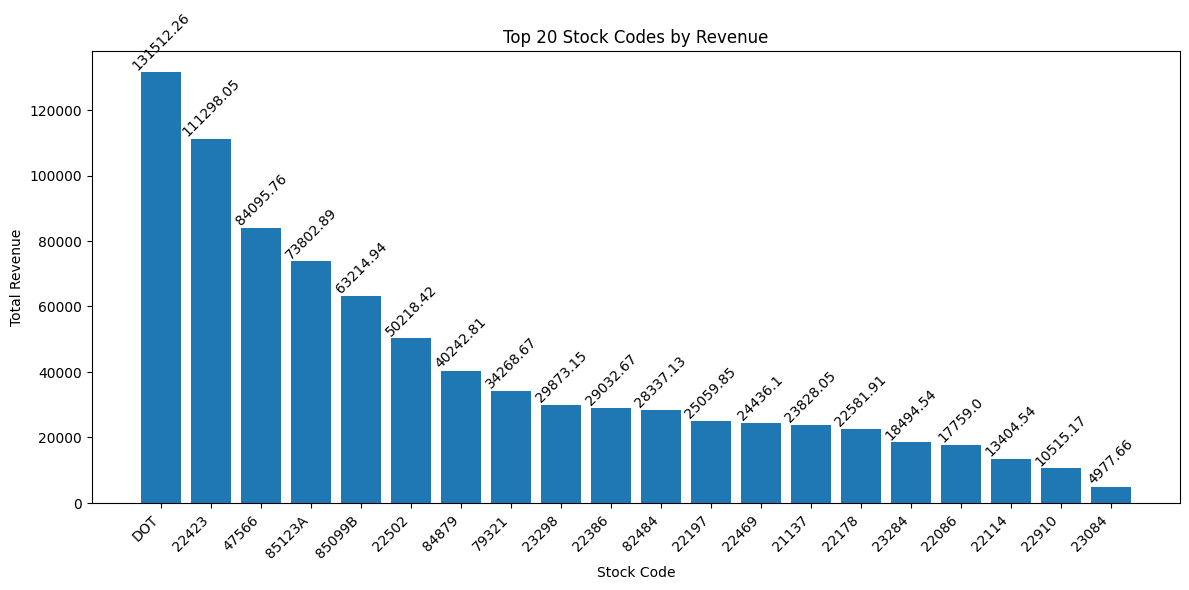

In [5]:
# Calculate revenue per stock code
stock_revenue = df_train.groupby('StockCode')['Revenue'].sum()

# Sort by revenue and get the top 20
top_20_stock_revenue = stock_revenue.sort_values(ascending=False).head(20)

# Create the bar plot
plt.figure(figsize=(12, 6))
bars = plt.bar(top_20_stock_revenue.index, top_20_stock_revenue.values)
plt.xlabel("Stock Code")
plt.ylabel("Total Revenue")
plt.title("Top 20 Stock Codes by Revenue")
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center', rotation=45)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [7]:
def plot_fitted_price_demand(df, sc, order):

  desc = df[df['StockCode'] == sc]
  # Assuming 'desc' DataFrame is already defined as in the previous code
  x = desc['UnitPrice']
  y = desc['Quantity']

  # Fit a polynomial of degree 2 (you can adjust the degree)
  coefficients = np.polyfit(x, y, order)
  polynomial = np.poly1d(coefficients)

  # Generate x values for the fitted curve
  x_fit = np.linspace(x.min(), x.max(), 100)
  y_fit = polynomial(x_fit)


  plt.figure(figsize=(8, 6))
  sns.scatterplot(x='UnitPrice', y='Quantity', data=desc)
  plt.plot(x_fit, y_fit, color='red', label='Fitted Polynomial') # Plot the fitted polynomial

  plt.title(f'Unit Price vs. Quantity for Stock Code {sc}')
  plt.xlabel('Unit Price')
  plt.ylabel('Quantity')
  plt.legend() # Show the legend
  plt.show()

In [89]:
df_train['StockCode'].nunique()

20

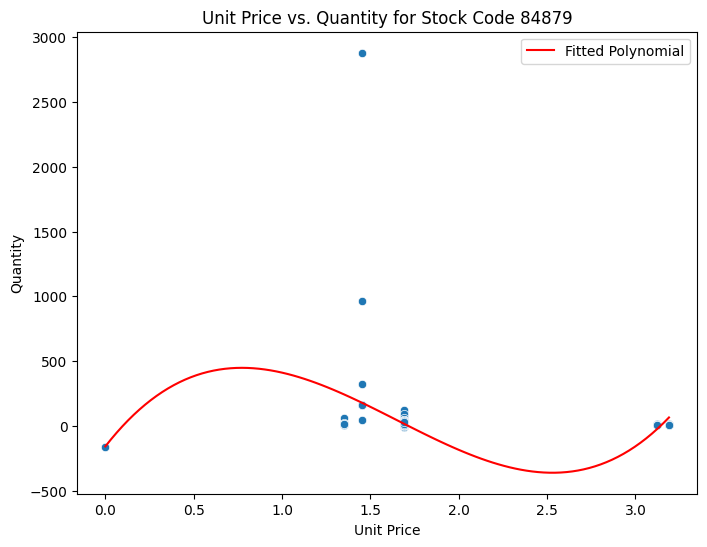

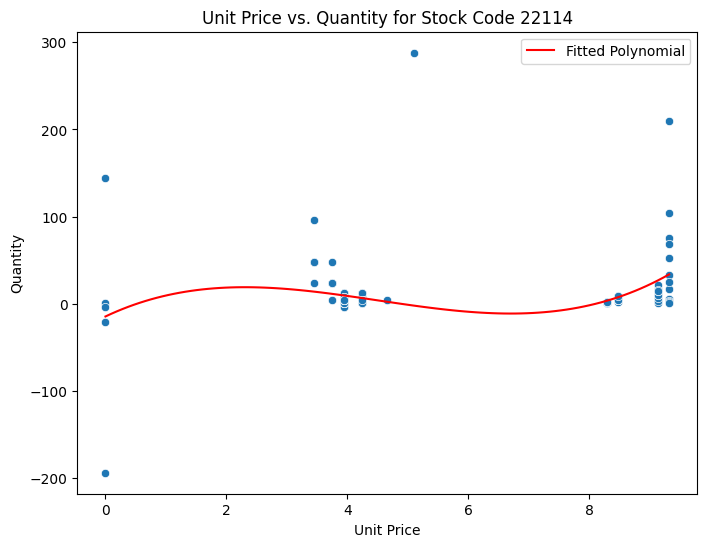

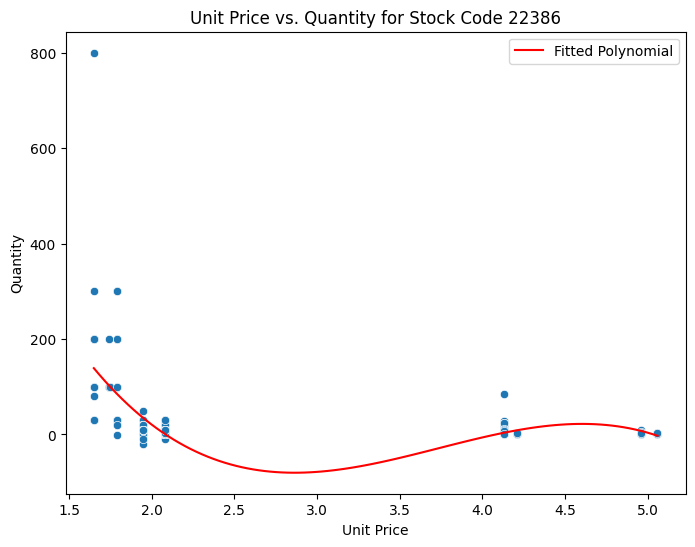

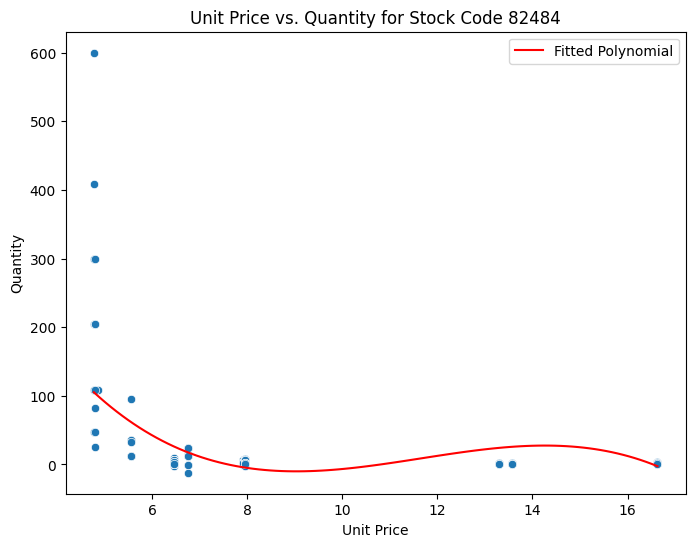

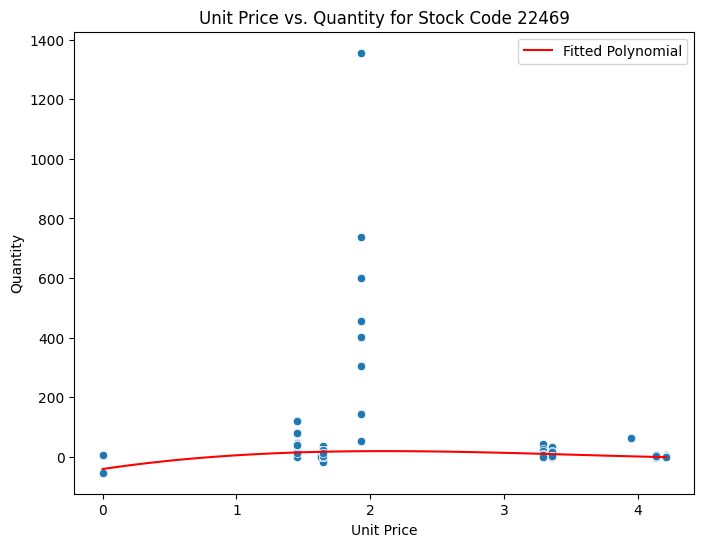

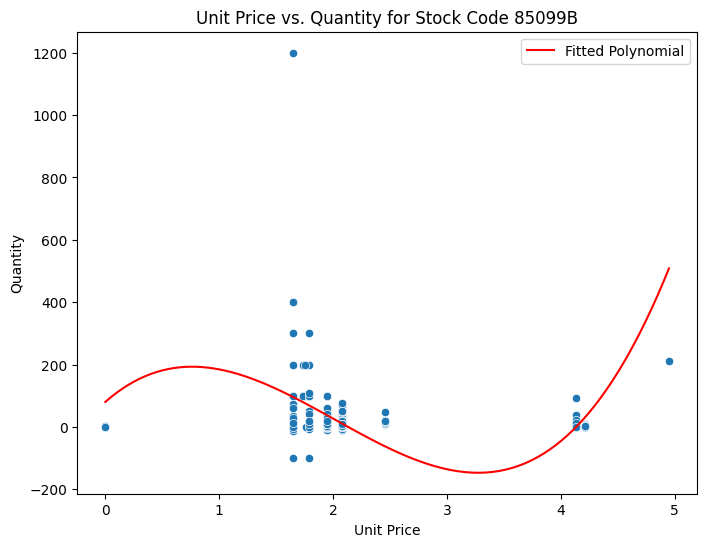

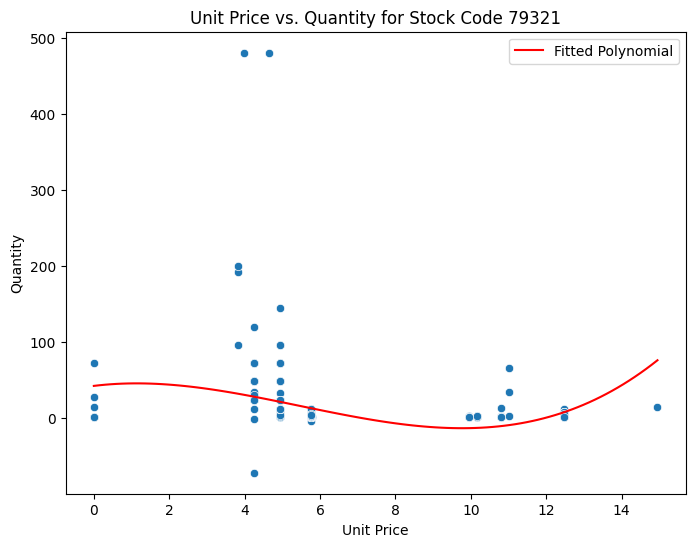

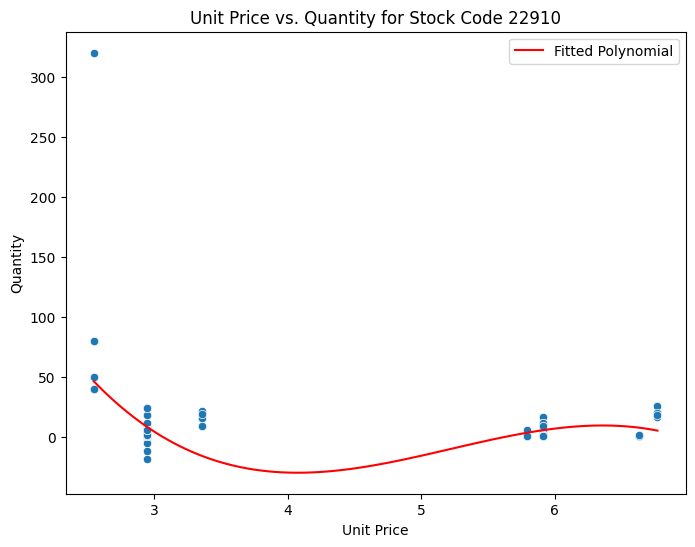

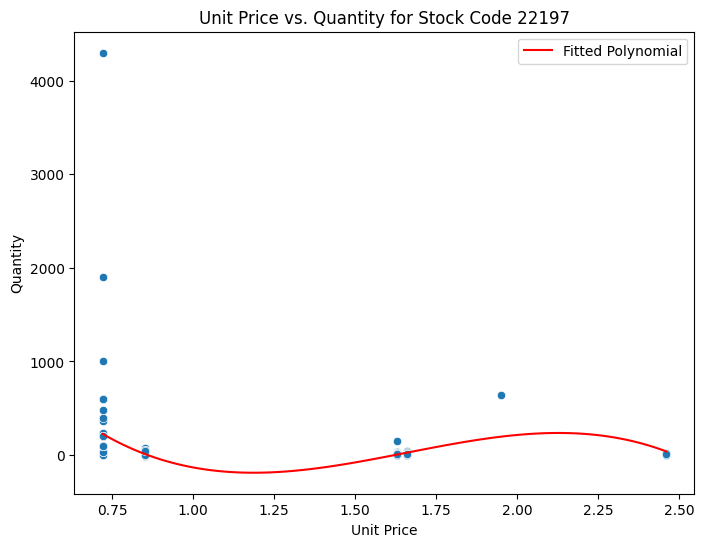

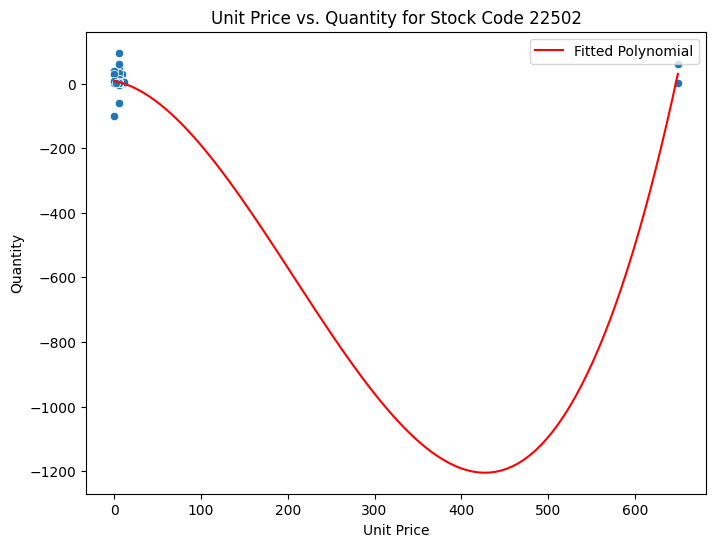

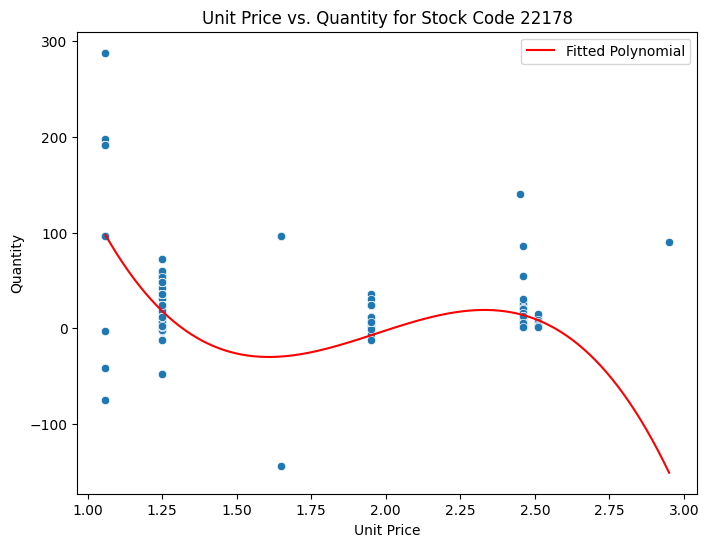

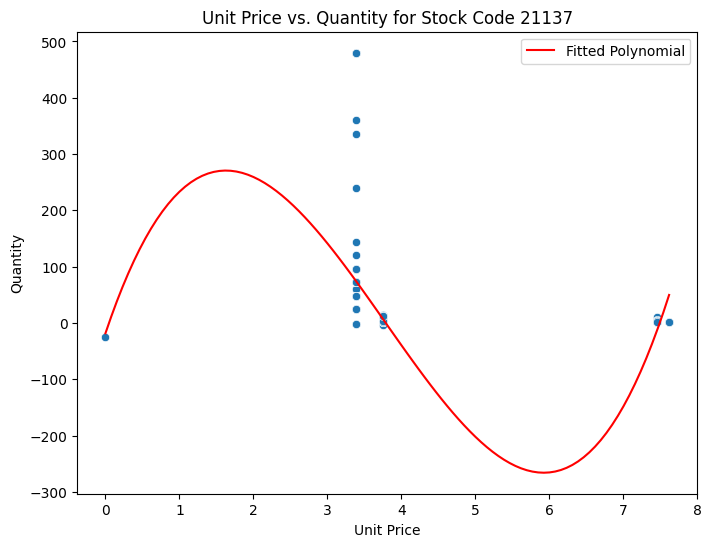

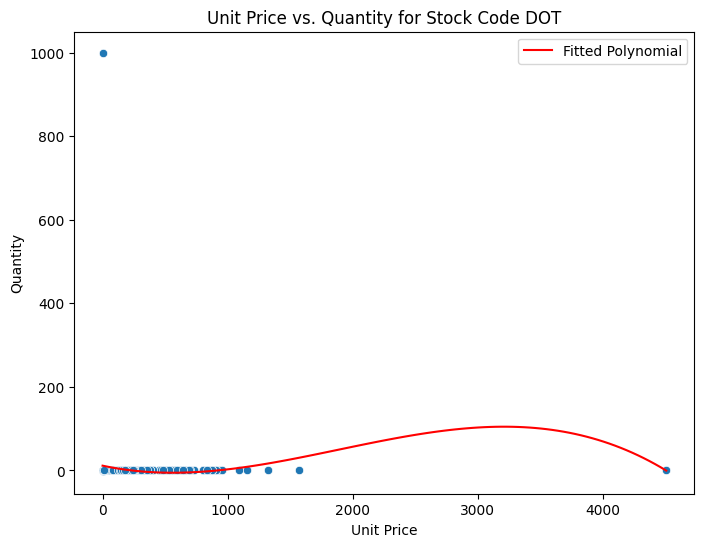

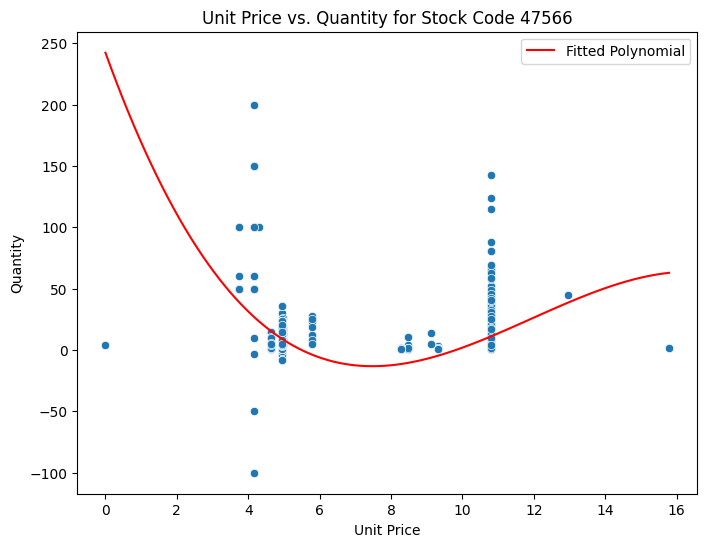

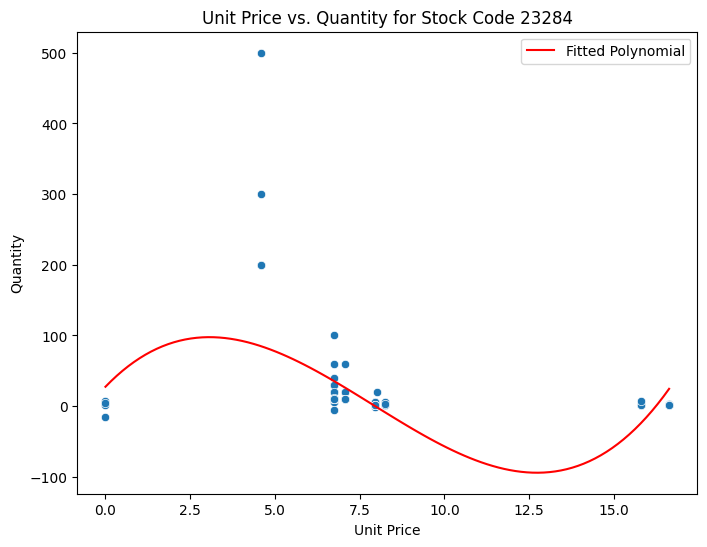

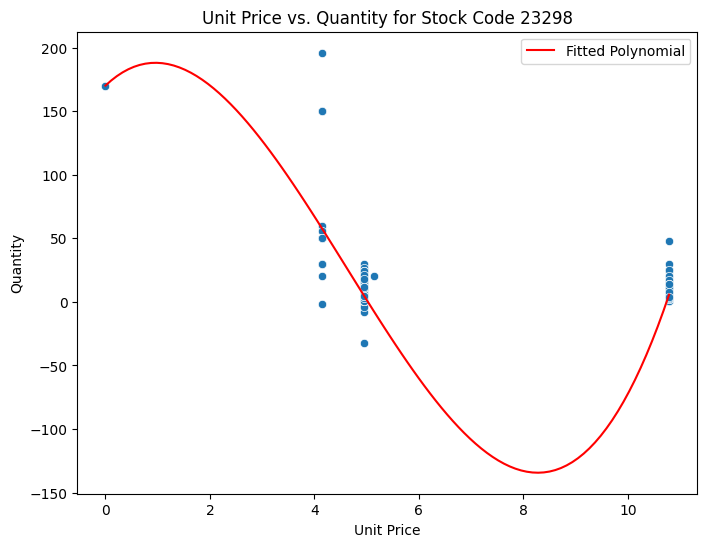

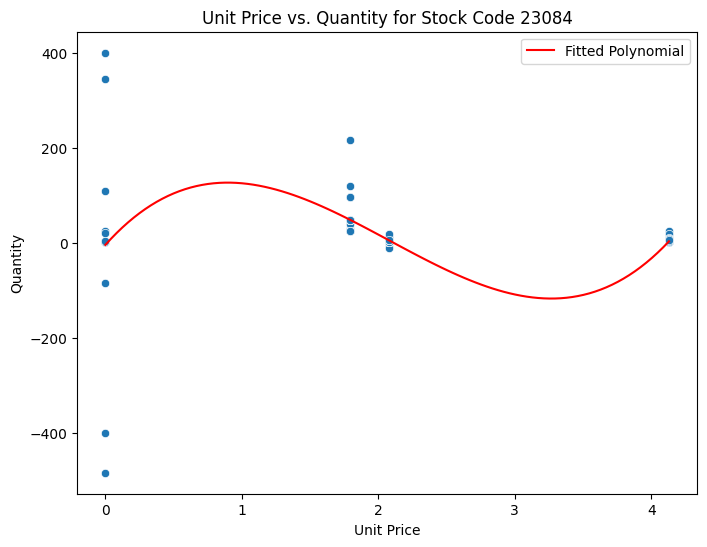

In [30]:
for sc in df_train['StockCode'].unique():
  plot_fitted_price_demand(df_train, sc, 3)

In [90]:
all_gam_results_univariate = pd.DataFrame()
unique_prod = df_train['StockCode'].unique()
for product in unique_prod:
    # Filter for current product
    # Use .loc accessor for indexing and filtering to avoid potential ambiguity
    product_data = df_train.loc[df_train['StockCode'] == product]

    # Predictors & target split
    X = product_data[['UnitPrice']]
    y = product_data['Quantity']

    # List of quantiles for modeling
    quantiles = [0.025, 0.5, 0.975]
    gam_results = {}

    # Fit the GAM model
    for q in quantiles:
        gam = ExpectileGAM(s(0), expectile=q) # instance the model
        gam.fit(X,y) #fit
        gam_results[f'pred_{q}'] = gam.predict(X) #predict for that quantile

    # Store the results in a DF
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

    # Concatenate results column-wise with the original data
    # Ensure 'price' and 'Product' columns are actually present in your DataFrame
    predictions_gam_df = pd.concat([product_data[['UnitPrice', 'StockCode','Quantity']], predictions_gam], axis=1)

    # Concatenate results row-wise
    all_gam_results_univariate = pd.concat([all_gam_results_univariate, predictions_gam_df], axis=0)

In [92]:
all_gam_results_univariate

UnitPrice StockCode  Quantity  pred_0.025   pred_0.5  pred_0.975
0           2.55    85123A         6 -196.935781  50.421142  390.701798
3           2.55    85123A         6 -196.935781  50.421142  390.701798
4           2.55    85123A         6 -196.935781  50.421142  390.701798
14          2.55    85123A        64 -196.935781  50.421142  390.701798
19          2.55    85123A        32 -196.935781  50.421142  390.701798
...          ...       ...       ...         ...        ...         ...
15279       4.13     23084        10    1.100626   2.972208   10.337785
15283       4.13     23084         7    1.100626   2.972208   10.337785
15294       4.13     23084         7    1.100626   2.972208   10.337785
15446       0.00     23084         3 -377.124217  -4.324760  318.009937
15480       4.13     23084         6    1.100626   2.972208   10.337785

[15503 rows x 6 columns]

In [101]:
rmse_df = pd.DataFrame(columns=['StockCode', 'RMSE'])

for stock_code in all_gam_results_univariate['StockCode'].unique():
    stock_data = all_gam_results_univariate[all_gam_results_univariate['StockCode'] == stock_code]
    rmse_values = []
    for col in ['pred_0.025', 'pred_0.5', 'pred_0.975']:
        rmse = np.sqrt(mean_squared_error(stock_data['Quantity'], stock_data[col]))
        rmse_values.append(rmse)
    avg_rmse = np.mean(rmse_values)
    rmse_df = pd.concat([rmse_df, pd.DataFrame({'StockCode': [stock_code], 'RMSE': [avg_rmse]})], ignore_index=True)

def calculate_mae(df, quantiles):
  """Calculates the MAE for each quantile and averages over them."""
  mae_values = {}
  for q in quantiles:
    mae = mean_absolute_error(df['Quantity'], df[f'pred_{q}'])
    mae_values[q] = mae
  return mae_values

# Assuming 'all_gam_results_univariate' DataFrame is available
quantiles = [0.025, 0.5, 0.975]
mae_by_stockcode = {}

for stockcode in all_gam_results_univariate['StockCode'].unique():
    stock_data = all_gam_results_univariate[all_gam_results_univariate['StockCode'] == stockcode]
    mae_by_stockcode[stockcode] = calculate_mae(stock_data, quantiles)


# Average MAE across quantiles for each stock code
average_mae = {}
for stockcode, mae_values in mae_by_stockcode.items():
    average_mae[stockcode] = sum(mae_values.values()) / len(mae_values)

# Create a DataFrame from the results
mae_df = pd.DataFrame(list(average_mae.items()), columns=['StockCode', 'Average_MAE'])

df_univariate_expgam = pd.merge(rmse_df, mae_df, on='StockCode', how='inner')
df_univariate_expgam

<ipython-input-101-03921fb59a79>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


StockCode        RMSE  Average_MAE
0     85123A  175.768991    58.486330
1      84879  142.903363    40.086476
2      22086   28.438712    15.113436
3      22114   40.512231    22.984599
4      22386   45.499588    19.025877
5      82484   40.103361    11.020037
6      22469   65.312605    35.713042
7     85099B   59.683267    27.616724
8      79321   52.781853    26.111333
9      22910   27.394612    13.517085
10     22197  252.015628    72.361122
11     22502   14.281484    10.072840
12     22178   34.225975    21.692173
13     22423   22.927492    11.573547
14     21137  104.049614    61.253703
15       DOT   58.203988    26.550957
16     47566   23.858092    14.400462
17     23284   27.382296    10.225675
18     23298   13.472489     7.532426
19     23084   81.062139    23.344337

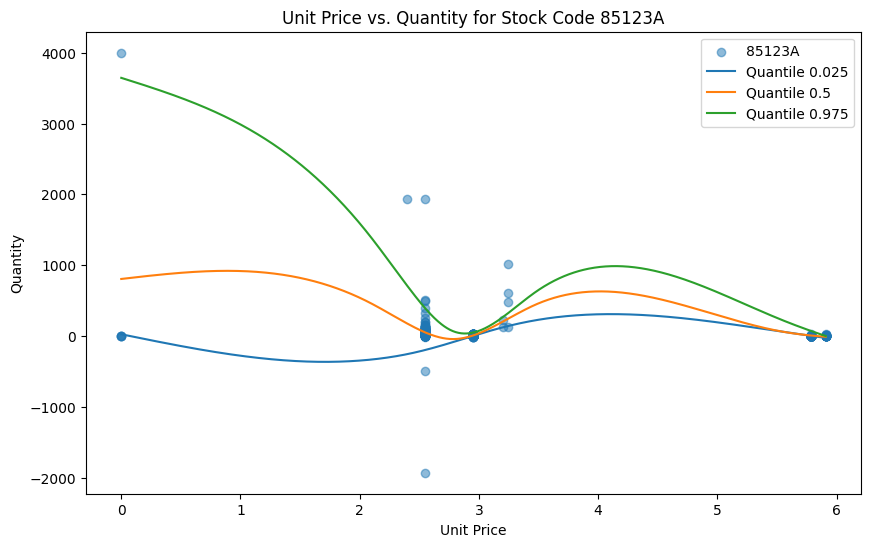

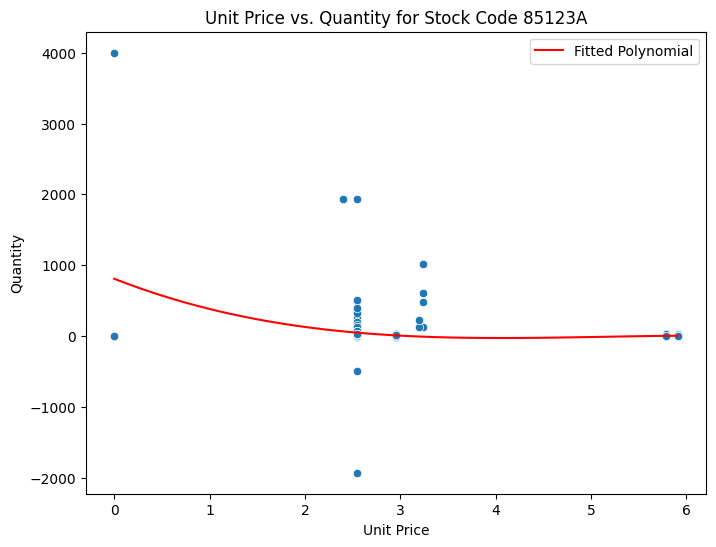

In [12]:
# Comparison of GAM fitted curve vs Polynomial fit
product = '85123A'
product_data = df_train.loc[df_train['StockCode'] == product]
X = product_data[['UnitPrice']]
y = product_data['Quantity']
quantiles = [0.025, 0.5, 0.975]
# Store fitted GAM models
gam_models = {}  # Changed from gam_results to gam_models

for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q) # instance the model
    gam.fit(X,y) #fit
    gam_models[q] = gam  # Store the model itself

plt.figure(figsize=(10, 6))
plt.scatter(X,y,alpha=0.5, label=f"{product}")
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1,1)
for q, gam in gam_models.items():  # Changed from gam_results to gam_models
  plt.plot(XX, gam.predict(XX), label=f'Quantile {q}')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title(f'Unit Price vs. Quantity for Stock Code {product}')
plt.legend() # To show the label
plt.show()   # To show the plot

plot_fitted_price_demand(df_train, product, 3)



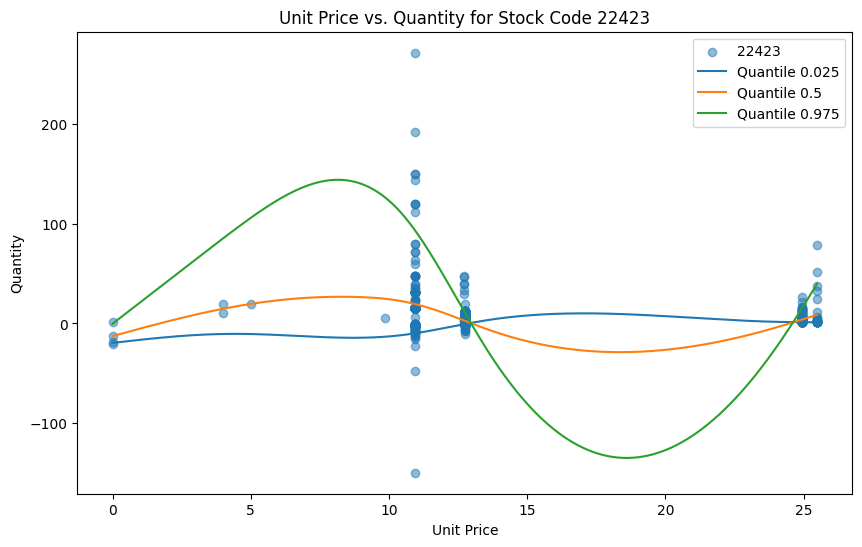

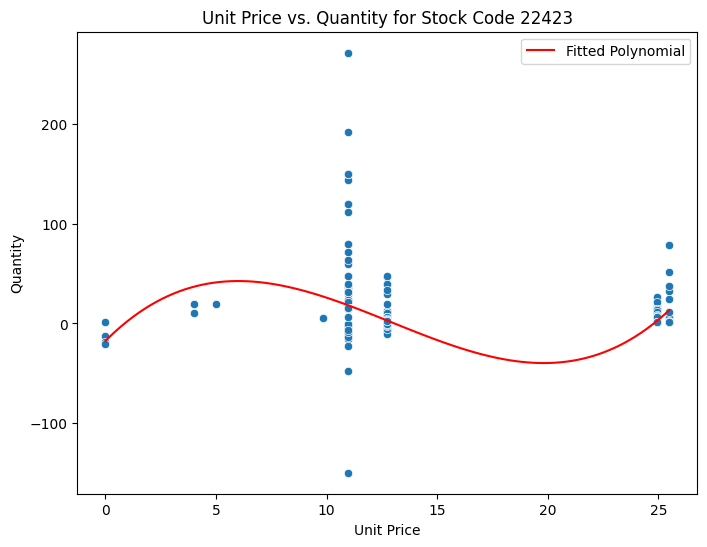

In [18]:
product = '22423'
product_data = df_train.loc[df_train['StockCode'] == product]
X = product_data[['UnitPrice']]
y = product_data['Quantity']
quantiles = [0.025, 0.5, 0.975]
# Store fitted GAM models
gam_models = {}  # Changed from gam_results to gam_models

for q in quantiles:
    gam = ExpectileGAM(s(0), expectile=q) # instance the model
    gam.fit(X,y) #fit
    gam_models[q] = gam  # Store the model itself

plt.figure(figsize=(10, 6))
plt.scatter(X,y,alpha=0.5, label=f"{product}")
XX = np.linspace(X.min(), X.max(), 1000).reshape(-1,1)
for q, gam in gam_models.items():  # Changed from gam_results to gam_models
  plt.plot(XX, gam.predict(XX), label=f'Quantile {q}')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.title(f'Unit Price vs. Quantity for Stock Code {product}')
plt.legend() # To show the label
plt.show()   # To show the plot

plot_fitted_price_demand(df_train, product, 3)

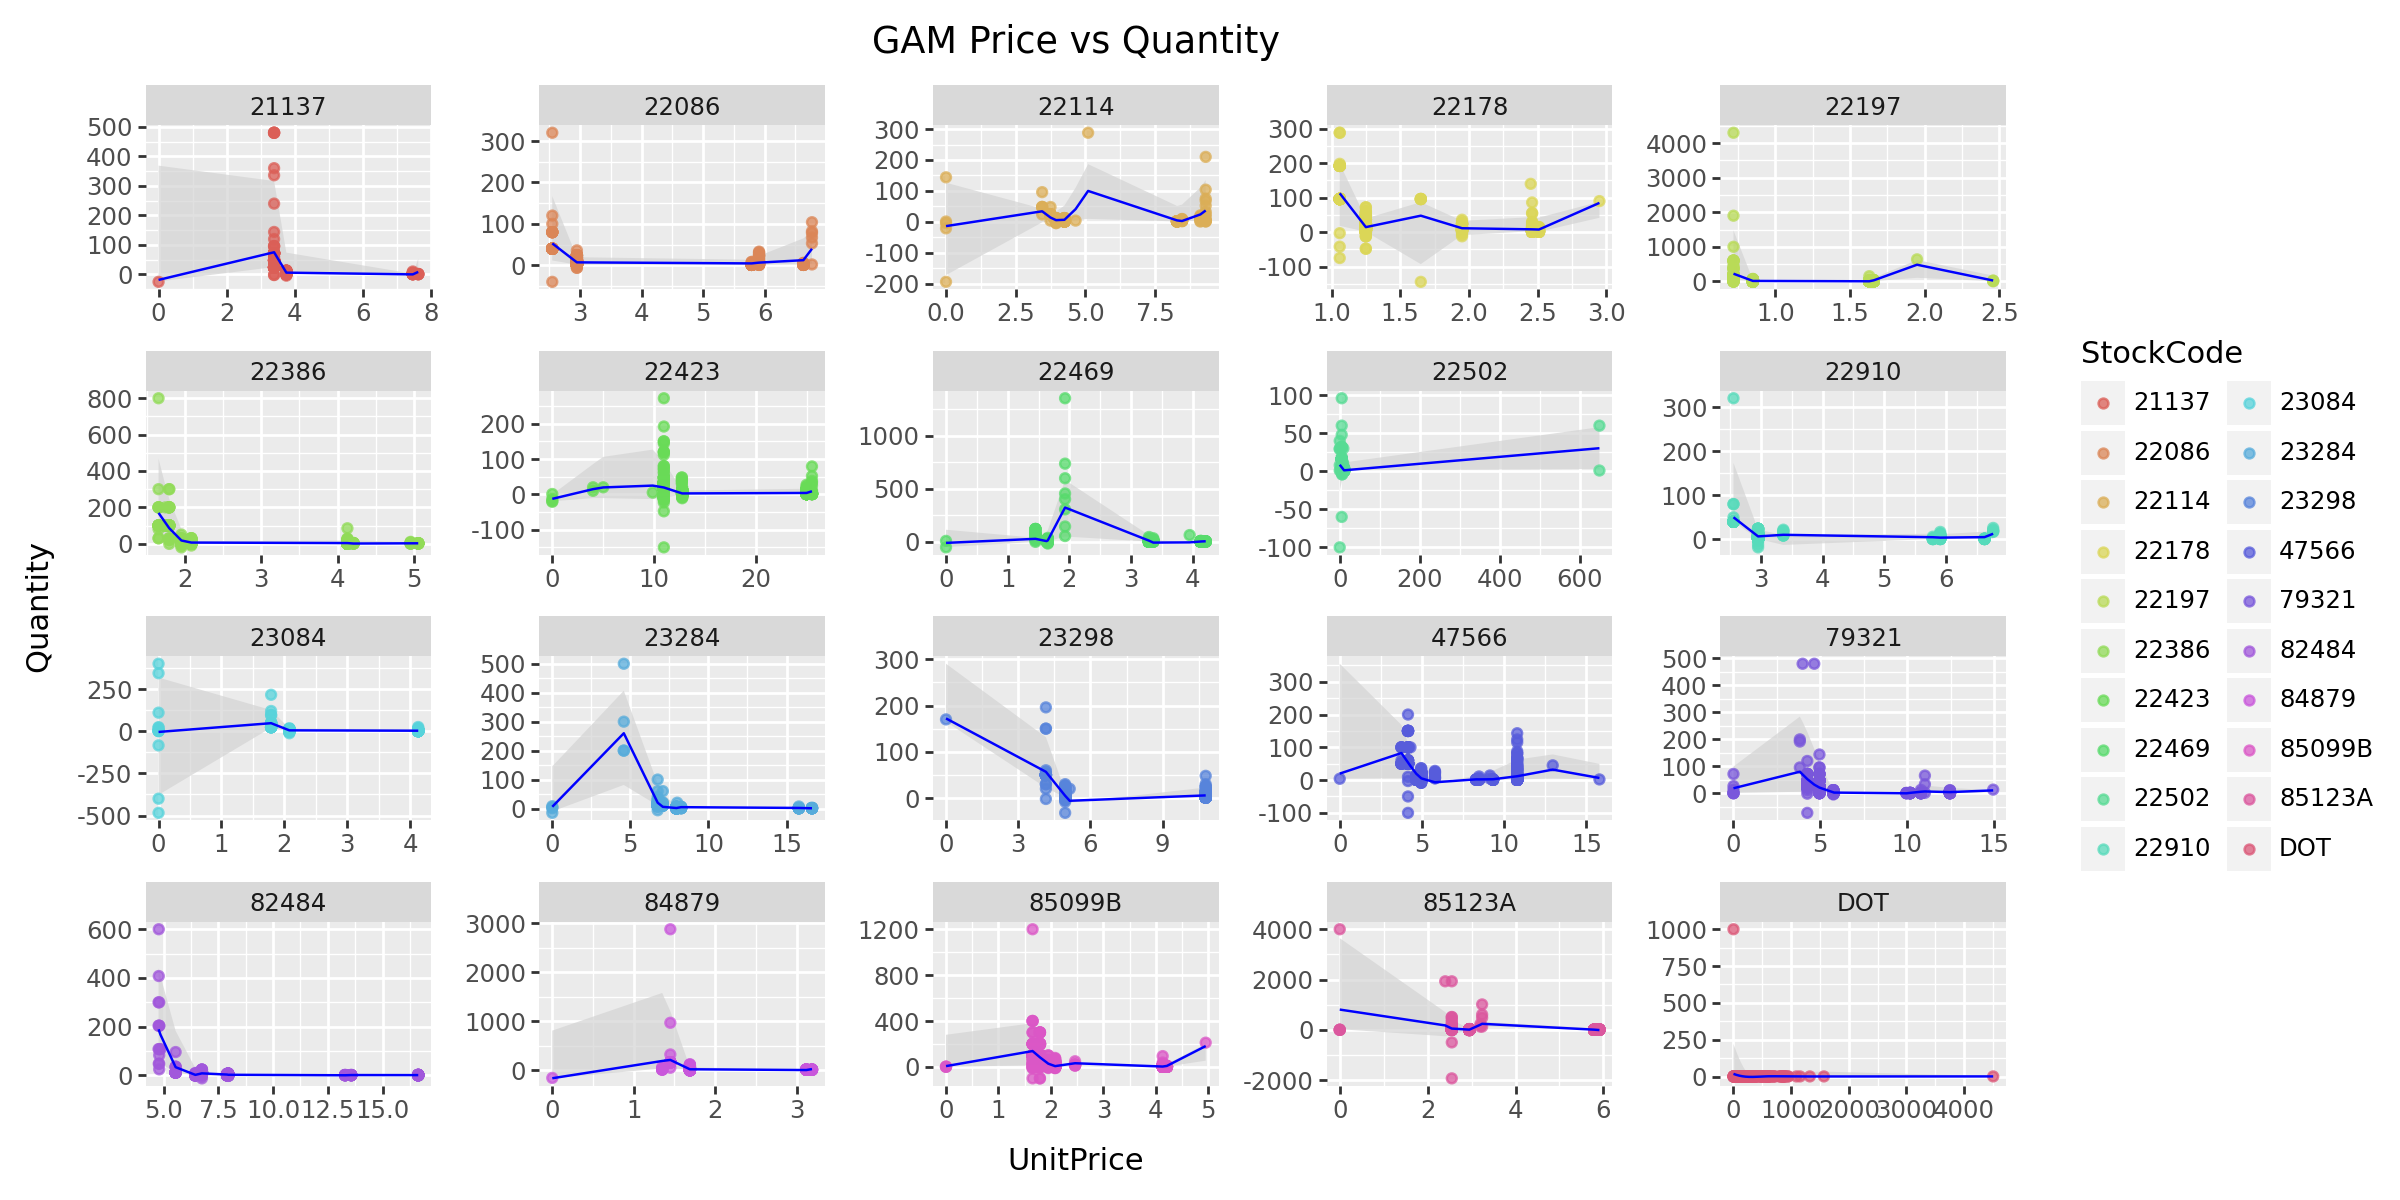

In [93]:
(ggplot(
    data = all_gam_results_univariate,
    mapping = aes(x='UnitPrice', y='Quantity', color='StockCode', group= 'StockCode') ) +
    geom_ribbon(aes(ymax= 'pred_0.975', ymin= 'pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
    geom_point(alpha=0.75) +
    geom_line(aes(y='pred_0.5'), color='blue') +
    facet_wrap('StockCode', scales='free') +
    labs(title='GAM Price vs Quantity') +
    theme(figure_size=(12,6))
)

In [102]:
for col in all_gam_results_univariate.columns:
    if col.startswith('pred'):
        all_gam_results_univariate['revenue_' + col] = all_gam_results_univariate['UnitPrice'] * all_gam_results_univariate[col]

# Actual revenue
all_gam_results_univariate['revenue_actual'] = all_gam_results_univariate['UnitPrice'] * all_gam_results_univariate['Quantity']

# View
all_gam_results_univariate.sample(2)

UnitPrice StockCode  Quantity  pred_0.025   pred_0.5  pred_0.975  \
13602       5.79    85123A         1    1.540776   6.451664   69.230067   
11783       1.69     84879        40    6.668403  16.880053   56.526894   

       revenue_pred_0.025  revenue_pred_0.5  revenue_pred_0.975  \
13602            8.921092         37.355137          400.842090   
11783           11.269601         28.527289           95.530451   

       revenue_actual  
13602            5.79  
11783           67.60

In [103]:
best_50 = (
    all_gam_results_univariate
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 97.5% percentile revenue is the max
best_975 = (
    all_gam_results_univariate
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 2.5% percentile revenue is the max
best_025 = (
    all_gam_results_univariate
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1))
    .reset_index(level=0, drop=True)
)

<ipython-input-103-40d80317086b>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
<ipython-input-103-40d80317086b>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
<ipython-input-103-40d80317086b>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `i

In [104]:
best_50

UnitPrice StockCode  Quantity  pred_0.025    pred_0.5   pred_0.975  \
51          3.39     21137       480   25.173427   75.249415   316.601825   
296         6.77     22086        78    4.452738   39.917923    80.052144   
14663       5.10     22114       288    9.622538   99.915529   186.400235   
5284        2.95     22178        90   41.662234   84.735053    88.037297   
5283        1.95     22197       637  102.716039  481.482627   616.750689   
751         1.65     22386       200   58.175195  169.384207   467.594798   
5403        9.86     22423         5  -13.356080   24.781233   126.629612   
577         1.93     22469       402   49.495934  323.255297   583.550336   
9430      649.50     22502        60    3.112510   30.318257    57.996747   
13          2.55     22910        40   40.105709   50.161346   173.408810   
7374        1.79     23084        24   20.817622   47.603855   125.488415   
7684        4.58     23284       200   81.416335  259.965127   406.887932   
6785        4.15     23298       150   22.495706   56.735661   131.510729   
5287       12.95     47566        45    4.955091   31.963721    78.305700   
11          3.82     79321       192    5.973693   80.235842   284.230960   
3175        4.77     82484       204   53.033983  189.265026   440.566150   
193         1.45     84879       320   41.950717  208.179308  1205.344229   
5286        4.95    85099B       211   54.127760  181.580397   201.270360   
2048        3.24    85123A      1010  139.355848  239.746122   316.584887   
12641    4505.17       DOT         1    1.000228    1.003584     3.230173   

       revenue_pred_0.025  revenue_pred_0.5  revenue_pred_0.975  \
51              85.337919        255.095517         1073.280187   
296             30.145037        270.244335          541.953012   
14663           49.074941        509.569198          950.641197   
5284           122.903591        249.968405          259.710026   
5283           200.296276        938.891122         1202.663844   
751             95.989071        279.483941          771.531416   
5403          -131.690950        244.342959         1248.567976   
577             95.527153        623.882724         1126.252149   
9430          2021.574943      19691.707917        37668.887150   
13             102.269557        127.911432          442.192466   
7374            37.263543         85.210900          224.624263   
7684           372.886812       1190.640282         1863.546726   
6785            93.357181        235.452992          545.769524   
5287            64.168432        413.930189         1014.058810   
11              22.819508        306.500916         1085.762268   
3175           252.972097        902.794173         2101.500534   
193             60.828539        301.859996         1747.749132   
5286           267.932412        898.822965          996.288280   
2048           451.512948        776.777436         1025.735034   
12641         4506.198775       4521.315124        14552.478064   

       revenue_actual  
51            1627.20  
296            528.06  
14663         1468.80  
5284           265.50  
5283          1242.15  
751            330.00  
5403            49.30  
577            775.86  
9430         38970.00  
13             102.00  
7374            42.96  
7684           916.00  
6785           622.50  
5287           582.75  
11             733.44  
3175           973.08  
193            464.00  
5286          1044.45  
2048          3272.40  
12641         4505.17

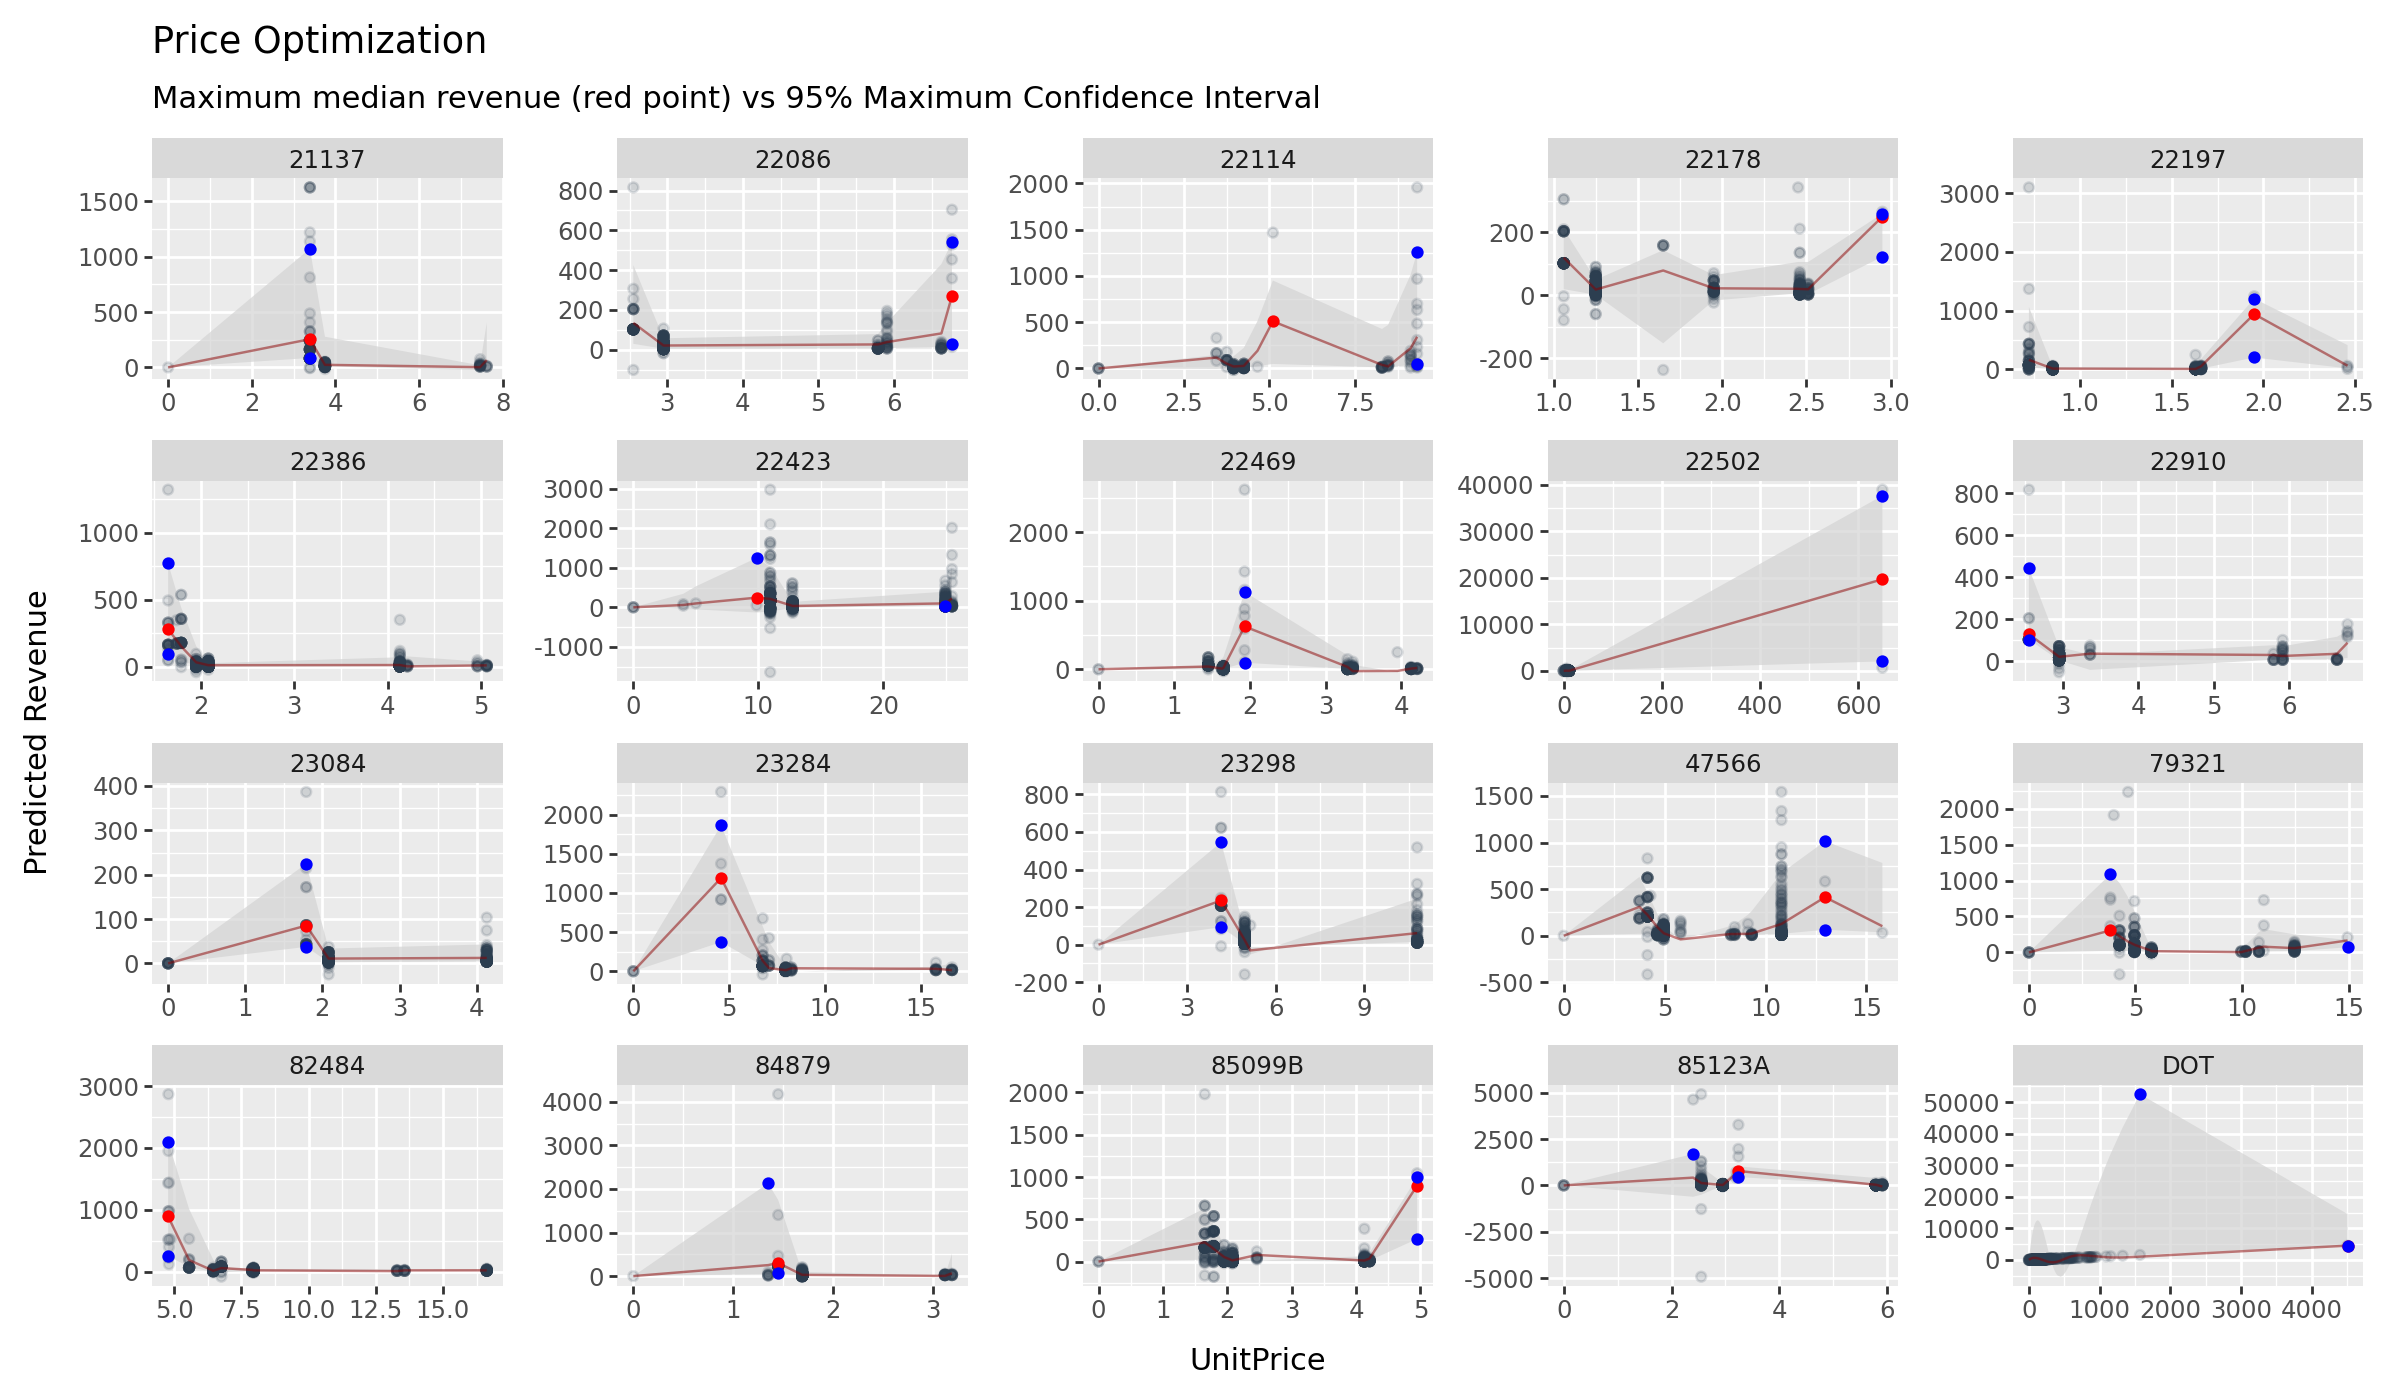

In [105]:
(ggplot(
    # Data
    data = all_gam_results_univariate,
    # Axes
    mapping = aes(x='UnitPrice', y='revenue_pred_0.5', color='StockCode', group='StockCode') ) +
# Adding the Band
geom_ribbon(aes(ymax= 'revenue_pred_0.975', ymin= 'revenue_pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
# Adding the points
geom_point(aes(y='revenue_actual'), alpha=0.15, color="#2C3E50") +
# Adding 50th percentile line
geom_line(aes(y='revenue_pred_0.5'), alpha=0.5, color='darkred') +
# Addimg the 50th pct points
geom_point(data=best_50, color='red') +
# Addimg the 97th pct points
geom_point(data=best_975, mapping= aes(y='revenue_pred_0.975'), color='blue') +
# Addimg the 2.5th pct points
geom_point(data=best_025, mapping= aes(y='revenue_pred_0.025'), color='blue') +
# Wraps by product
facet_wrap('StockCode', scales='free') +
# Labels
labs(
    title='Price Optimization',
    subtitle='Maximum median revenue (red point) vs 95% Maximum Confidence Interval',
    x= 'UnitPrice',
    y= 'Predicted Revenue'
    ) +
theme(figure_size=(12,7))

)

Multi-variate GAM

In [21]:
print(df_train.info())
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15503 entries, 0 to 15502
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    15503 non-null  object        
 1   StockCode    15503 non-null  object        
 2   Description  15503 non-null  object        
 3   Quantity     15503 non-null  int64         
 4   InvoiceDate  15503 non-null  datetime64[ns]
 5   UnitPrice    15503 non-null  float64       
 6   CustomerID   15503 non-null  int64         
 7   Country      15503 non-null  object        
 8   Revenue      15503 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 1.1+ MB
None


InvoiceNo StockCode                         Description  Quantity  \
0    536365    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536367     84879       ASSORTED COLOUR BIRD ORNAMENT        32   
2    536371     22086     PAPER CHAIN KIT 50'S CHRISTMAS         80   
3    536373    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
4    536375    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Revenue  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom    15.30  
1 2010-12-01 08:34:00       1.69       13047  United Kingdom    54.08  
2 2010-12-01 09:00:00       2.55       13748  United Kingdom   204.00  
3 2010-12-01 09:02:00       2.55       17850  United Kingdom    15.30  
4 2010-12-01 09:32:00       2.55       17850  United Kingdom    15.30

In [25]:
def plot_boxplots(df, stock_code):
  """
  Creates boxplots for unit price and quantity for a given StockCode.

  Args:
    df: The DataFrame containing the data.
    stock_code: The StockCode for which to create the boxplots.
  """

  # Filter data for the specified StockCode
  stock_data = df[df['StockCode'] == stock_code]

  # Create subplots
  fig, axes = plt.subplots(1, 2, figsize=(12, 5))

  # Plot boxplot for UnitPrice
  sns.boxplot(ax=axes[0], y='UnitPrice', data=stock_data)
  axes[0].set_title(f'Boxplot of UnitPrice for StockCode {stock_code}')

  # Plot boxplot for Quantity
  sns.boxplot(ax=axes[1], y='Quantity', data=stock_data)
  axes[1].set_title(f'Boxplot of Quantity for StockCode {stock_code}')

  plt.tight_layout()
  plt.show()

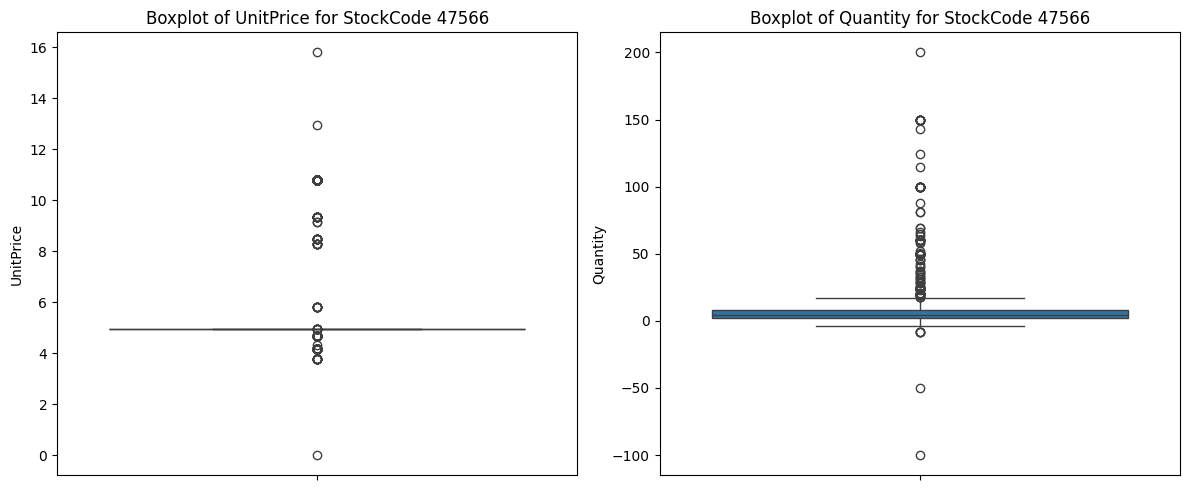

In [30]:
plot_boxplots(df_train, '47566')

In [24]:
df_train1 = df_train[~df_train['InvoiceNo'].str.contains('C', na=False)]

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

df_train1 = remove_outliers_iqr(df_train1, 'UnitPrice')
df_train1.shape

(13301, 9)

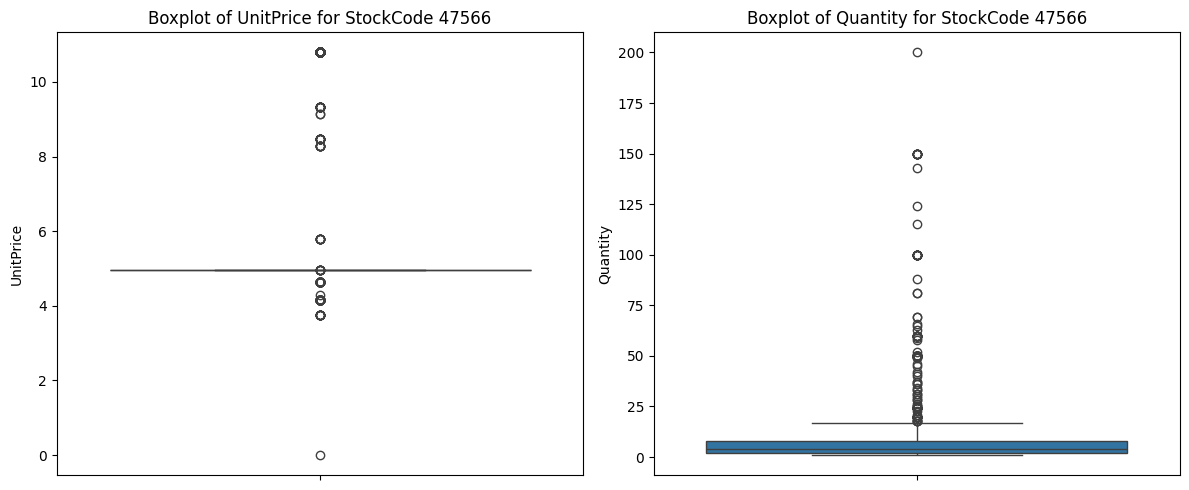

In [31]:
plot_boxplots(df_train1, '47566')

In [32]:
df_train2 = df_train1.copy()
df_train2['InvoiceDayOfWeek'] = df_train2['InvoiceDate'].dt.dayofweek
# Monday=0, Sunday=6
df_train2['IsWeekend'] = df_train2['InvoiceDayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

# Month
df_train2['Month'] = df_train2['InvoiceDate'].dt.month
df_train2.sample(5)

InvoiceNo StockCode                         Description  Quantity  \
8981     555570     23298                      SPOTTY BUNTING         3   
10646    559017     22469               HEART OF WICKER SMALL         3   
5816     549583     84879       ASSORTED COLOUR BIRD ORNAMENT         8   
11046    559799     22386             JUMBO BAG PINK POLKADOT         1   
1440     539317    85123A  WHITE HANGING HEART T-LIGHT HOLDER         4   

              InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
8981  2011-06-05 15:36:00       4.95       15152  United Kingdom    14.85   
10646 2011-07-05 13:06:00       1.65       14034  United Kingdom     4.95   
5816  2011-04-11 09:46:00       1.69       15214  United Kingdom    13.52   
11046 2011-07-12 13:46:00       4.13       99999  United Kingdom     4.13   
1440  2010-12-16 19:04:00       2.95       17392  United Kingdom    11.80   

       InvoiceDayOfWeek  IsWeekend  Month  
8981                  6          1      6  
10646                 1          0      7  
5816                  0          0      4  
11046                 1          0      7  
1440                  3          0     12

In [35]:
df_train3 = df_train2.copy()
df_train3['ProductSaleFrequency'] = df_train3.groupby('StockCode')['Quantity'].transform('count')
# This is how many times a particular product was invoiced by different customers

# Create customer-based features
df_train3['CustomerOrderCount'] = df_train3.groupby('CustomerID')['InvoiceNo'].transform('count')
# This is how many times a customer ordered through this online store

# Customer Recency - How recently did a customer make a transaction at the online store
import datetime as dt
max_date = df_train3['InvoiceDate'].max()
latest_date = dt.datetime(max_date.year, max_date.month, max_date.day)

recency = (latest_date - df_train3.groupby("CustomerID").agg({"InvoiceDate":"max"}))
recency.rename(columns = {"InvoiceDate":"Customer_Recency"}, inplace = True)
# Change the values to day format
recency_df = recency["Customer_Recency"].apply(lambda x: x.days).reset_index()
df_train3 = pd.merge(df_train3, recency_df, on='CustomerID', how='left')
df_train3.sample(5)

InvoiceNo StockCode                         Description  Quantity  \
4430     548203    85099B             JUMBO BAG RED RETROSPOT       211   
8122     556808     47566                       PARTY BUNTING        16   
10826    563181    85123A  WHITE HANGING HEART T-LIGHT HOLDER         6   
10622    562621    85099B             JUMBO BAG RED RETROSPOT        10   
5175     550474     47566                       PARTY BUNTING         4   

              InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
4430  2011-03-29 16:41:00       4.95       99999  United Kingdom  1044.45   
8122  2011-06-14 15:45:00       4.95       17749  United Kingdom    79.20   
10826 2011-08-12 14:32:00       2.95       16612  United Kingdom    17.70   
10622 2011-08-08 12:36:00       2.08       14415  United Kingdom    20.80   
5175  2011-04-18 13:58:00      10.79       99999  United Kingdom    43.16   

       InvoiceDayOfWeek  IsWeekend  Month  ProductSaleFrequency  \
4430                  1          0      3                  1504   
8122                  1          0      6                  1410   
10826                 4          0      8                  1719   
10622                 0          0      8                  1504   
5175                  0          0      4                  1410   

       CustomerOrderCount  Customer_Recency  
4430                 2635                -1  
8122                    4               107  
10826                   7                48  
10622                  25                27  
5175                 2635                -1

In [60]:
df_train4 = df_train3.copy()
df_train4['month_num'] = df_train4['Month'].apply(lambda x: (x - 1) % 12 + 1)

# Apply sine and cosine transformation
df_train4['month_sin'] = np.sin(2 * np.pi * df_train4['month_num'] / 12)
df_train4['month_cos'] = np.cos(2 * np.pi * df_train4['month_num'] / 12)

# Target Encoding for Each Stockcode
# Calculate the mean of 'Quantity' for each 'StockCode'

stockcode_target_encoding = df_train4.groupby('StockCode')['Quantity'].mean()

# # Merge the target encoding back into the main DataFrame
df_train4['StockCode_TargetEncoded'] = df_train4['StockCode'].map(stockcode_target_encoding)

df_train4.sample(5)

InvoiceNo StockCode                        Description  Quantity  \
4609     548780    85099B            JUMBO BAG RED RETROSPOT        10   
10449    562283     23298                     SPOTTY BUNTING        12   
3583     545883     79321                      CHILLI LIGHTS         4   
10532    562456     84879      ASSORTED COLOUR BIRD ORNAMENT        24   
523      537465     22114  HOT WATER BOTTLE TEA AND SYMPATHY         4   

              InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
4609  2011-04-04 12:37:00       1.95       13294  United Kingdom    19.50   
10449 2011-08-04 10:43:00       4.95       15249  United Kingdom    59.40   
3583  2011-03-07 15:40:00       5.75       15974  United Kingdom    23.00   
10532 2011-08-05 10:39:00       1.69       15194  United Kingdom    40.56   
523   2010-12-07 10:32:00       3.95       17735  United Kingdom    15.80   

       InvoiceDayOfWeek  IsWeekend  Month  ProductSaleFrequency  \
4609                  0          0      4                  1504   
10449                 3          0      8                   829   
3583                  0          0      3                   408   
10532                 4          0      8                  1018   
523                   1          0     12                   231   

       CustomerOrderCount  Customer_Recency  month_num     month_sin  \
4609                    3               118          4  8.660254e-01   
10449                  14                36          8 -8.660254e-01   
3583                   13                24          3  1.000000e+00   
10532                  15                 7          8 -8.660254e-01   
523                    22                22         12 -2.449294e-16   

          month_cos  StockCode_TargetEncoded  
4609  -5.000000e-01                21.789894  
10449 -5.000000e-01                 7.226779  
3583   6.123234e-17                16.308824  
10532 -5.000000e-01                24.307466  
523    1.000000e+00                 9.558442

In [67]:
feat_sel = ['InvoiceDate','StockCode', 'Description',
            'UnitPrice', 'IsWeekend', 'ProductSaleFrequency', 'CustomerOrderCount',
            'Customer_Recency', 'month_sin', 'month_cos', 'StockCode_TargetEncoded']
target = 'Quantity'

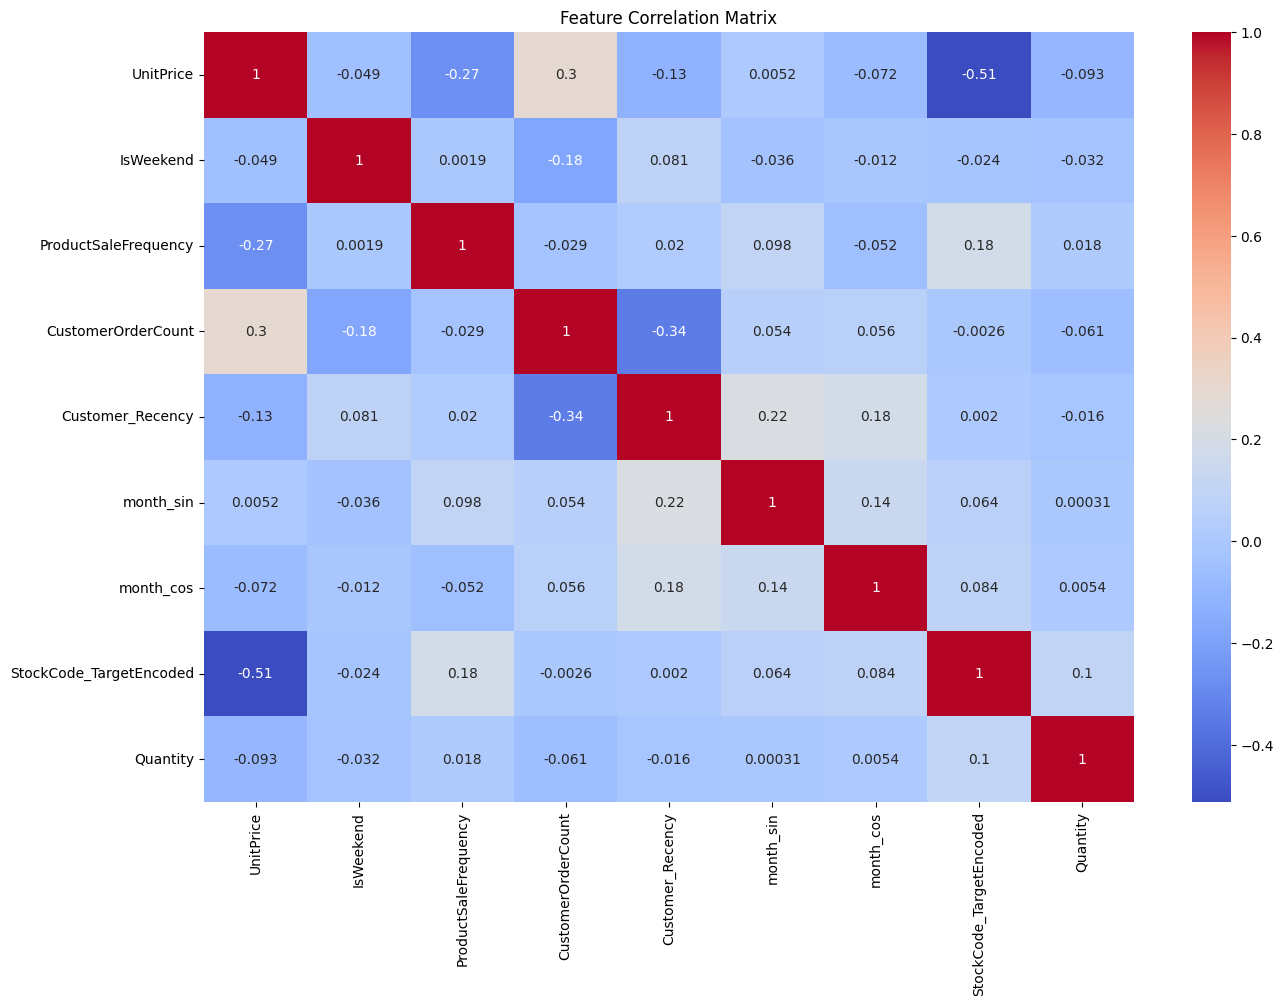

In [68]:
# Create correlation matrix visualization
plt.figure(figsize=(15, 10))
correlation_matrix = df_train4[feat_sel[3:] + ["Quantity"]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [70]:
X_train = df_train4[feat_sel[3:]]
y_train = df_train4[target]
X = sm.add_constant(X_train) # adding intercept
y = y_train

# Model Fit
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     30.97
Date:                Sat, 12 Apr 2025   Prob (F-statistic):           1.53e-48
Time:                        23:50:17   Log-Likelihood:                -76641.
No. Observations:               13301   AIC:                         1.533e+05
Df Residuals:                   13292   BIC:                         1.534e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

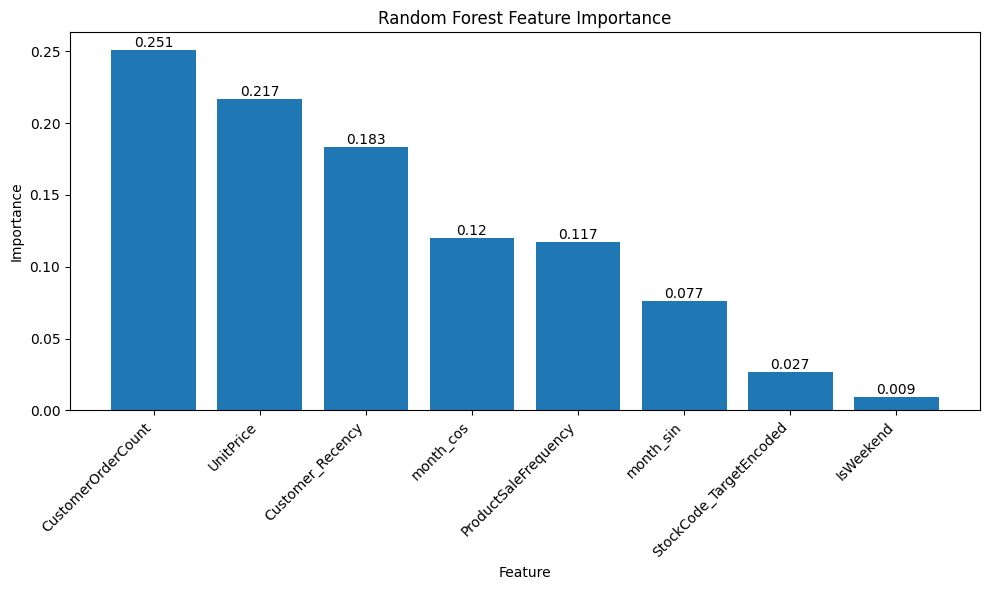

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Assuming X_train and y_train are defined as in your original code
model_rf = RandomForestRegressor(n_estimators=100, random_state=42) # You can adjust hyperparameters
model_rf.fit(X_train, y_train)

# Get feature importances
importances = model_rf.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting feature importances with data labels
plt.figure(figsize=(10, 6))
bars = plt.bar(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.xticks(rotation=45, ha='right')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), va='bottom', ha='center')

plt.tight_layout()
plt.show()


In [84]:
all_gam_results = pd.DataFrame()
unique_prod = df_train4['StockCode'].unique()
for product in unique_prod:
    # Filter for current product
    # Use .loc accessor for indexing and filtering to avoid potential ambiguity
    product_data = df_train4.loc[df_train4['StockCode'] == product]

    # Predictors & target split
    X = product_data[feat_sel[3:]]
    y = product_data['Quantity']

    # List of quantiles for modeling
    quantiles = [0.025, 0.5, 0.975]
    gam_results = {}

    # Fit the GAM model
    for q in quantiles:
        gam = ExpectileGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7), expectile=q) # instance the model
        gam.fit(X,y) #fit
        gam_results[f'pred_{q}'] = gam.predict(X) #predict for that quantile

    # Store the results in a DF
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

    # Concatenate results column-wise with the original data
    # Ensure 'price' and 'Product' columns are actually present in your DataFrame
    predictions_gam_df = pd.concat([product_data[['UnitPrice', 'StockCode','Quantity']], predictions_gam], axis=1)

    # Concatenate results row-wise
    all_gam_results = pd.concat([all_gam_results, predictions_gam_df], axis=0)

In [85]:
all_gam_results

UnitPrice StockCode  Quantity  pred_0.025   pred_0.5  pred_0.975
0           2.55    85123A         6    7.370735  33.699350  246.842099
3           2.55    85123A         6    7.370735  33.699350  246.842099
4           2.55    85123A         6    7.370735  33.699350  246.842099
14          2.55    85123A        64   29.501856  50.733076  274.122910
19          2.55    85123A        32   31.787484  58.843548  311.980221
...          ...       ...       ...         ...        ...         ...
13098       4.13     23084        10  -15.210222   4.592780    7.075439
13102       4.13     23084         7  -15.210222   4.592780    7.075439
13110       4.13     23084         7  -15.210222   4.592780    7.075439
13249       0.00     23084         3 -385.517338  -5.303227  286.972779
13282       4.13     23084         6  -15.210222   4.592780    7.075439

[13301 rows x 6 columns]

In [106]:
# Metrics - RMSE and MAE
rmse_df = pd.DataFrame(columns=['StockCode', 'RMSE'])

for stock_code in all_gam_results['StockCode'].unique():
    stock_data = all_gam_results[all_gam_results['StockCode'] == stock_code]
    rmse_values = []
    for col in ['pred_0.025', 'pred_0.5', 'pred_0.975']:
        rmse = np.sqrt(mean_squared_error(stock_data['Quantity'], stock_data[col]))
        rmse_values.append(rmse)
    avg_rmse = np.mean(rmse_values)
    rmse_df = pd.concat([rmse_df, pd.DataFrame({'StockCode': [stock_code], 'RMSE': [avg_rmse]})], ignore_index=True)

def calculate_mae(df, quantiles):
  """Calculates the MAE for each quantile and averages over them."""
  mae_values = {}
  for q in quantiles:
    mae = mean_absolute_error(df['Quantity'], df[f'pred_{q}'])
    mae_values[q] = mae
  return mae_values

# Assuming 'all_gam_results_univariate' DataFrame is available
quantiles = [0.025, 0.5, 0.975]
mae_by_stockcode = {}

for stockcode in all_gam_results['StockCode'].unique():
    stock_data = all_gam_results[all_gam_results['StockCode'] == stockcode]
    mae_by_stockcode[stockcode] = calculate_mae(stock_data, quantiles)


# Average MAE across quantiles for each stock code
average_mae = {}
for stockcode, mae_values in mae_by_stockcode.items():
    average_mae[stockcode] = sum(mae_values.values()) / len(mae_values)

# Create a DataFrame from the results
mae_df = pd.DataFrame(list(average_mae.items()), columns=['StockCode', 'Average_MAE'])

df_multivariate_expgam = pd.merge(rmse_df, mae_df, on='StockCode', how='inner')
df_multivariate_expgam

<ipython-input-106-95ba0301d98b>:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


StockCode        RMSE  Average_MAE
0     85123A  163.555914    52.520057
1      84879  143.859502    50.930276
2      22086   22.534666    12.001203
3      22114   36.799043    22.850082
4      22386   44.118083    20.341683
5      82484   38.184024    12.599037
6      22469   70.420465    35.577247
7     85099B   57.324957    28.737092
8      79321   49.684204    26.738805
9      22910   27.848908    14.338202
10     22197  250.632933    97.122955
11     22502   10.570951     4.726127
12     22178   25.699921    16.764243
13     22423   40.897846    25.644233
14     21137   91.762659    55.444456
15     47566   20.037018    11.981802
16       DOT  323.380265   142.063774
17     23284   20.416319     8.368598
18     23298   12.789432     7.148487
19     23084   81.560133    24.720684

In [115]:
df_combined = pd.merge(df_univariate_expgam, df_multivariate_expgam, on='StockCode', how='inner', suffixes=('_univariate', '_multivariate'))
df_combined

StockCode  RMSE_univariate  Average_MAE_univariate  RMSE_multivariate  \
0     85123A       175.768991               58.486330         163.555914   
1      84879       142.903363               40.086476         143.859502   
2      22086        28.438712               15.113436          22.534666   
3      22114        40.512231               22.984599          36.799043   
4      22386        45.499588               19.025877          44.118083   
5      82484        40.103361               11.020037          38.184024   
6      22469        65.312605               35.713042          70.420465   
7     85099B        59.683267               27.616724          57.324957   
8      79321        52.781853               26.111333          49.684204   
9      22910        27.394612               13.517085          27.848908   
10     22197       252.015628               72.361122         250.632933   
11     22502        14.281484               10.072840          10.570951   
12     22178        34.225975               21.692173          25.699921   
13     22423        22.927492               11.573547          40.897846   
14     21137       104.049614               61.253703          91.762659   
15       DOT        58.203988               26.550957         323.380265   
16     47566        23.858092               14.400462          20.037018   
17     23284        27.382296               10.225675          20.416319   
18     23298        13.472489                7.532426          12.789432   
19     23084        81.062139               23.344337          81.560133   

    Average_MAE_multivariate  
0                  52.520057  
1                  50.930276  
2                  12.001203  
3                  22.850082  
4                  20.341683  
5                  12.599037  
6                  35.577247  
7                  28.737092  
8                  26.738805  
9                  14.338202  
10                 97.122955  
11                  4.726127  
12                 16.764243  
13                 25.644233  
14                 55.444456  
15                142.063774  
16                 11.981802  
17                  8.368598  
18                  7.148487  
19                 24.720684

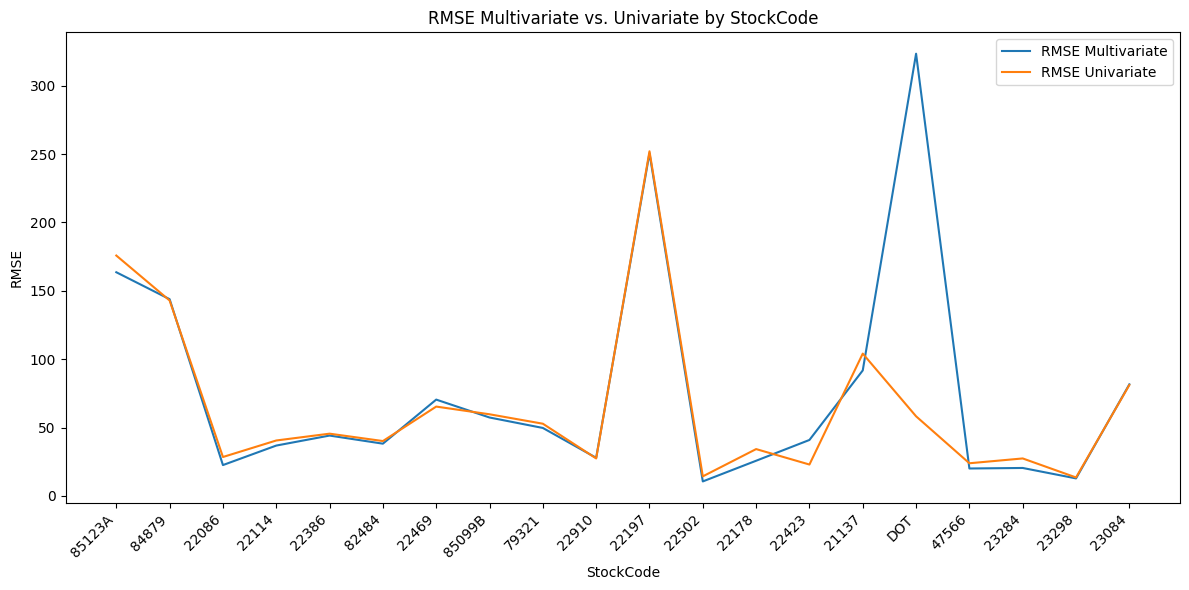

In [116]:
# Assuming df_combined is your DataFrame with 'StockCode', 'rmse_multivariate', and 'rmse_univariate' columns
# Replace 'df_combined' with the actual name of your DataFrame if it's different.

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_combined['StockCode'], df_combined['RMSE_multivariate'], label='RMSE Multivariate')
plt.plot(df_combined['StockCode'], df_combined['RMSE_univariate'], label='RMSE Univariate')

plt.xlabel('StockCode')
plt.ylabel('RMSE')
plt.title('RMSE Multivariate vs. Univariate by StockCode')
plt.legend()
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


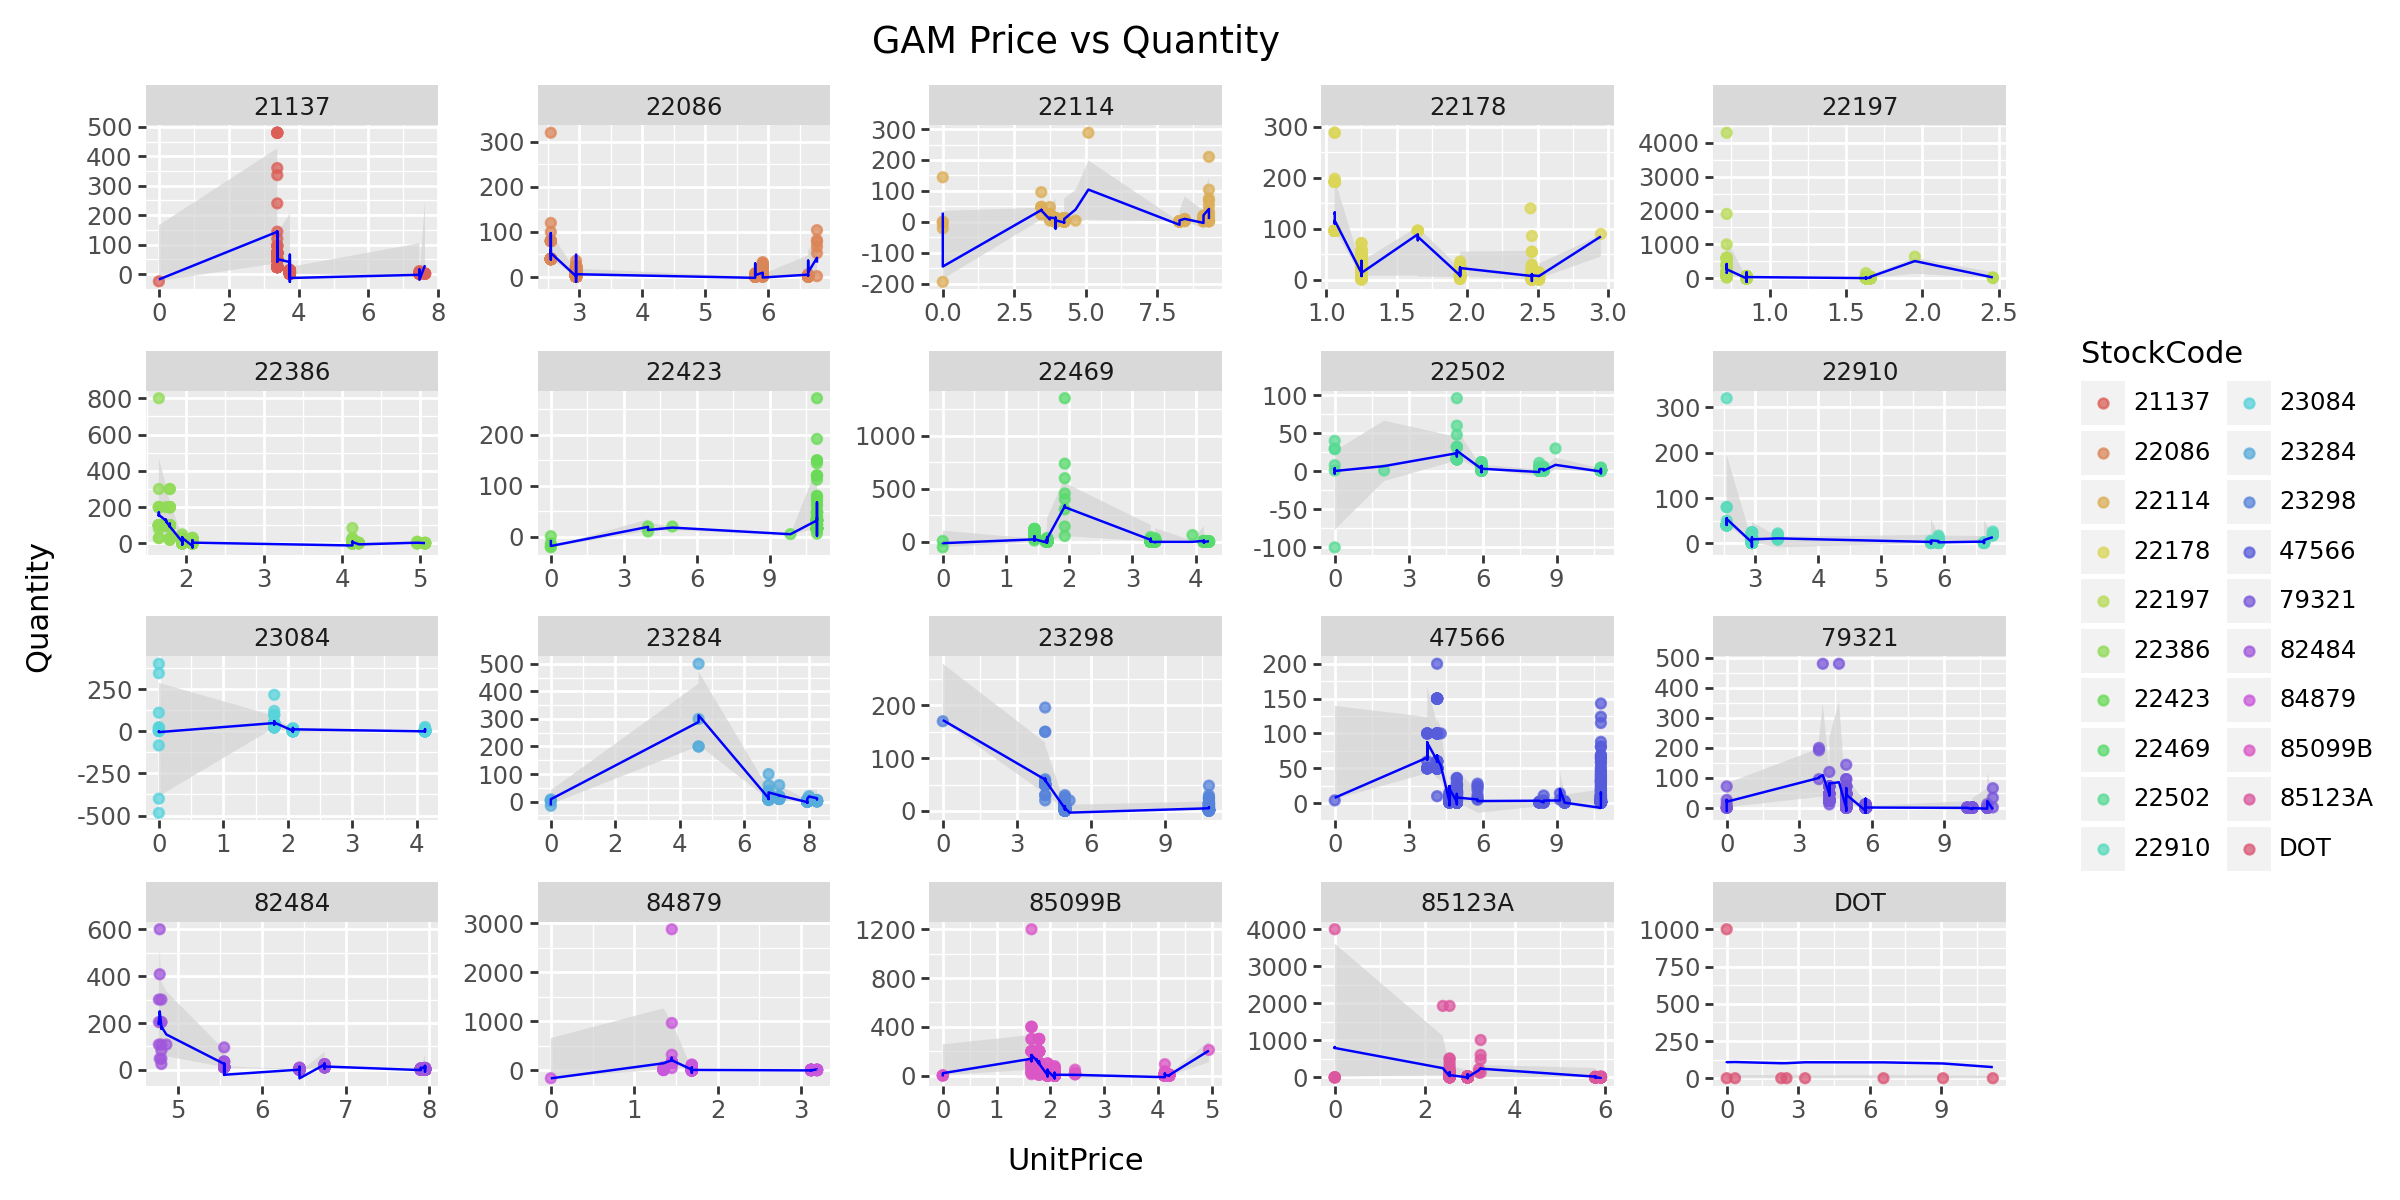

In [118]:
(ggplot(
    data = all_gam_results,
    mapping = aes(x='UnitPrice', y='Quantity', color='StockCode', group= 'StockCode') ) +
    geom_ribbon(aes(ymax= 'pred_0.975', ymin= 'pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
    geom_point(alpha=0.75) +
    geom_line(aes(y='pred_0.5'), color='blue') +
    facet_wrap('StockCode', scales='free') +
    labs(title='GAM Price vs Quantity') +
    theme(figure_size=(12,6))
)

In [119]:
for col in all_gam_results.columns:
    if col.startswith('pred'):
        all_gam_results['revenue_' + col] = all_gam_results['UnitPrice'] * all_gam_results[col]

# Actual revenue
all_gam_results['revenue_actual'] = all_gam_results['UnitPrice'] * all_gam_results['Quantity']
all_gam_results.sample(5)

UnitPrice StockCode  Quantity  pred_0.025   pred_0.5  pred_0.975  \
3389        1.95    85099B        10    7.785851  34.133735  211.802603   
10442      10.79     23298         2    1.467659   6.917106   30.049938   
2982        1.63     22197         2   -3.686502  -3.623970    1.978288   
3162        4.13    85099B        12   -8.677586 -12.590938   -0.379532   
9305        5.75     79321         4    2.566929  23.878916  204.236889   

       revenue_pred_0.025  revenue_pred_0.5  revenue_pred_0.975  \
3389            15.182410         66.560783          413.015076   
10442           15.836040         74.635576          324.238835   
2982            -6.008999         -5.907072            3.224610   
3162           -35.838432        -52.000575           -1.567467   
9305            14.759842        137.303769         1174.362114   

       revenue_actual  
3389            19.50  
10442           21.58  
2982             3.26  
3162            49.56  
9305            23.00

In [120]:
best_50 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.5'] == x['revenue_pred_0.5'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 97.5% percentile revenue is the max
best_975 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.975'] == x['revenue_pred_0.975'].max()].head(1))
    .reset_index(level=0, drop=True)
)

# Calculating where the predicted 2.5% percentile revenue is the max
best_025 = (
    all_gam_results
    .groupby('StockCode')
    .apply(lambda x: x[x['revenue_pred_0.025'] == x['revenue_pred_0.025'].max()].head(1))
    .reset_index(level=0, drop=True)
)

<ipython-input-120-fdc2b20b42a9>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
<ipython-input-120-fdc2b20b42a9>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
<ipython-input-120-fdc2b20b42a9>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `i

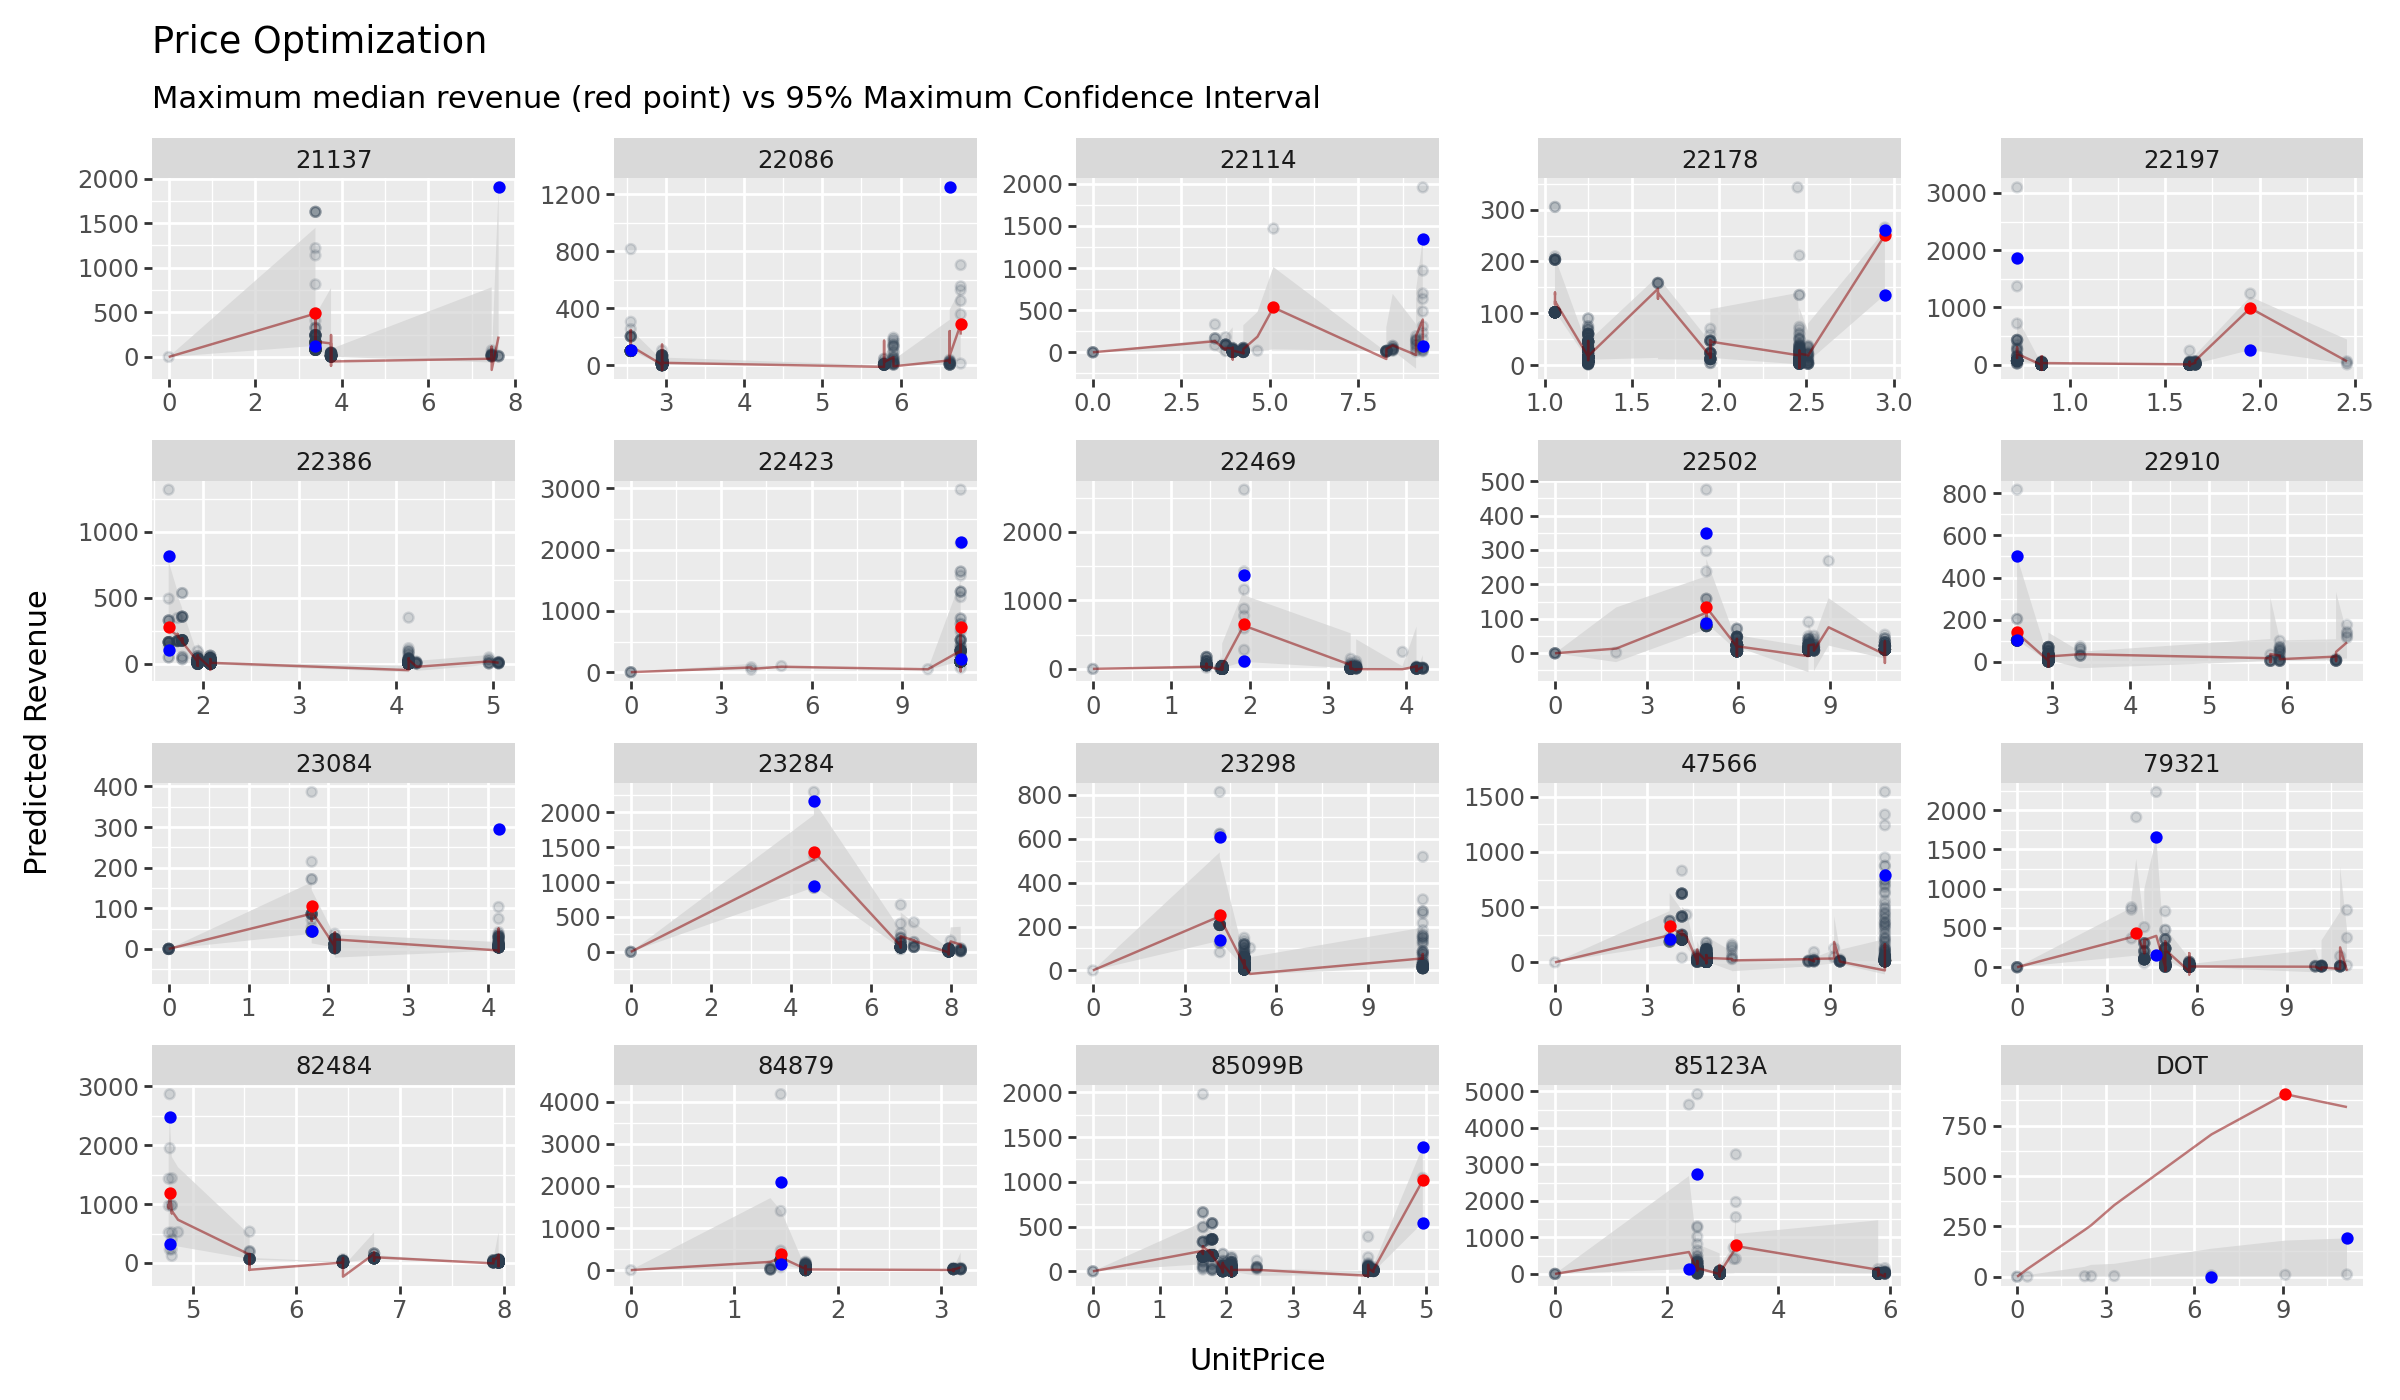

In [121]:
(ggplot(
    # Data
    data = all_gam_results,
    # Axes
    mapping = aes(x='UnitPrice', y='revenue_pred_0.5', color='StockCode', group='StockCode') ) +
# Adding the Band
geom_ribbon(aes(ymax= 'revenue_pred_0.975', ymin= 'revenue_pred_0.025'),
                fill='#d3d3d3', color= '#FF000000', alpha=0.7, show_legend=False) +
# Adding the points
geom_point(aes(y='revenue_actual'), alpha=0.15, color="#2C3E50") +
# Adding 50th percentile line
geom_line(aes(y='revenue_pred_0.5'), alpha=0.5, color='darkred') +
# Addimg the 50th pct points
geom_point(data=best_50, color='red') +
# Addimg the 97th pct points
geom_point(data=best_975, mapping= aes(y='revenue_pred_0.975'), color='blue') +
# Addimg the 2.5th pct points
geom_point(data=best_025, mapping= aes(y='revenue_pred_0.025'), color='blue') +
# Wraps by product
facet_wrap('StockCode', scales='free') +
# Labels
labs(
    title='Price Optimization',
    subtitle='Maximum median revenue (red point) vs 95% Maximum Confidence Interval',
    x= 'UnitPrice',
    y= 'Predicted Revenue'
    ) +
theme(figure_size=(12,7))

)

Multivariate with Categorical defined as f in expectile gam

In [122]:
df_train3.sample(5)

InvoiceNo StockCode                        Description  Quantity  \
11614    565233    85099B            JUMBO BAG RED RETROSPOT        17   
12203    566602     22114  HOT WATER BOTTLE TEA AND SYMPATHY         2   
4492     548468     47566                      PARTY BUNTING         4   
6690     553845     47566                      PARTY BUNTING         8   
4066     547106    85099B            JUMBO BAG RED RETROSPOT        10   

              InvoiceDate  UnitPrice  CustomerID         Country  Revenue  \
11614 2011-09-02 09:34:00       4.13       99999  United Kingdom    70.21   
12203 2011-09-13 16:05:00       8.29       99999  United Kingdom    16.58   
4492  2011-03-31 12:28:00       4.95       14818  United Kingdom    19.80   
6690  2011-05-19 12:38:00       4.95       17675  United Kingdom    39.60   
4066  2011-03-21 11:24:00       1.95       15039  United Kingdom    19.50   

       InvoiceDayOfWeek  IsWeekend  Month  ProductSaleFrequency  \
11614                 4          0      9                  1504   
12203                 1          0      9                   231   
4492                  3          0      3                  1410   
6690                  3          0      5                  1410   
4066                  0          0      3                  1504   

       CustomerOrderCount  Customer_Recency  
11614                2635                -1  
12203                2635                -1  
4492                    5                 2  
6690                   53                -1  
4066                   82                 9

In [129]:
# feat_sel_x = ['UnitPrice', 'ProductSaleFrequency', 'CustomerOrderCount',
#             'Customer_Recency', 'IsWeekend', 'Month']
feat_sel_x = ['UnitPrice','IsWeekend', 'Month']
all_gam_results_multivar_cat = pd.DataFrame()
unique_prod = df_train3['StockCode'].unique()
for product in unique_prod:
    # Filter for current product
    # Use .loc accessor for indexing and filtering to avoid potential ambiguity
    product_data = df_train3.loc[df_train3['StockCode'] == product]

    # Predictors & target split
    X = product_data[feat_sel_x]
    y = product_data['Quantity']

    # List of quantiles for modeling
    quantiles = [0.025, 0.5, 0.975]
    gam_results = {}

    # Fit the GAM model
    for q in quantiles:
        # gam = ExpectileGAM(s(0) + s(1) + s(2) + s(3) + f(4) + f(5), expectile=q) # instance the model
        gam = ExpectileGAM(s(0) + f(1) + f(2), expectile=q) # instance the model
        gam.fit(X,y) #fit
        gam_results[f'pred_{q}'] = gam.predict(X) #predict for that quantile

    # Store the results in a DF
    predictions_gam = pd.DataFrame(gam_results).set_index(X.index)

    # Concatenate results column-wise with the original data
    # Ensure 'price' and 'Product' columns are actually present in your DataFrame
    predictions_gam_df = pd.concat([product_data[['UnitPrice', 'StockCode','Quantity']], predictions_gam], axis=1)

    # Concatenate results row-wise
    all_gam_results_multivar_cat = pd.concat([all_gam_results_multivar_cat, predictions_gam_df], axis=0)

In [130]:
# Metrics - RMSE and MAE
rmse_df = pd.DataFrame(columns=['StockCode', 'RMSE'])

for stock_code in all_gam_results_multivar_cat['StockCode'].unique():
    stock_data = all_gam_results_multivar_cat[all_gam_results_multivar_cat['StockCode'] == stock_code]
    rmse_values = []
    for col in ['pred_0.025', 'pred_0.5', 'pred_0.975']:
        rmse = np.sqrt(mean_squared_error(stock_data['Quantity'], stock_data[col]))
        rmse_values.append(rmse)
    avg_rmse = np.mean(rmse_values)
    rmse_df = pd.concat([rmse_df, pd.DataFrame({'StockCode': [stock_code], 'RMSE': [avg_rmse]})], ignore_index=True)

def calculate_mae(df, quantiles):
  """Calculates the MAE for each quantile and averages over them."""
  mae_values = {}
  for q in quantiles:
    mae = mean_absolute_error(df['Quantity'], df[f'pred_{q}'])
    mae_values[q] = mae
  return mae_values

# Assuming 'all_gam_results_univariate' DataFrame is available
quantiles = [0.025, 0.5, 0.975]
mae_by_stockcode = {}

for stockcode in all_gam_results_multivar_cat['StockCode'].unique():
    stock_data = all_gam_results_multivar_cat[all_gam_results_multivar_cat['StockCode'] == stockcode]
    mae_by_stockcode[stockcode] = calculate_mae(stock_data, quantiles)


# Average MAE across quantiles for each stock code
average_mae = {}
for stockcode, mae_values in mae_by_stockcode.items():
    average_mae[stockcode] = sum(mae_values.values()) / len(mae_values)

# Create a DataFrame from the results
mae_df = pd.DataFrame(list(average_mae.items()), columns=['StockCode', 'Average_MAE'])

df_multivariate_cat_expgam = pd.merge(rmse_df, mae_df, on='StockCode', how='inner')
df_multivariate_cat_expgam

<ipython-input-130-bc90a57565ba>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


StockCode        RMSE  Average_MAE
0     85123A  162.257280    50.891692
1      84879  145.356516    46.705739
2      22086   23.265182    12.665111
3      22114   38.091546    22.924684
4      22386   44.640814    19.550869
5      82484   39.113150    11.091934
6      22469   67.920865    36.122726
7     85099B   57.048875    28.146376
8      79321   51.595002    26.255578
9      22910   27.171126    13.991755
10     22197  257.172401    88.722176
11     22502   10.613043     4.503738
12     22178   26.430001    17.850255
13     22423   46.054159    32.004858
14     21137   94.917091    56.041605
15     47566   20.227942    12.115946
16       DOT  368.506129   251.229446
17     23284   21.009602     8.122893
18     23298   12.852148     7.113137
19     23084   81.518710    24.552125

In [132]:
df_combined1 = pd.merge(df_combined, df_multivariate_cat_expgam, on='StockCode', how='inner', suffixes=('_newrmse', '_newmae'))
df_combined1

StockCode  RMSE_univariate  Average_MAE_univariate  RMSE_multivariate  \
0     85123A       175.768991               58.486330         163.555914   
1      84879       142.903363               40.086476         143.859502   
2      22086        28.438712               15.113436          22.534666   
3      22114        40.512231               22.984599          36.799043   
4      22386        45.499588               19.025877          44.118083   
5      82484        40.103361               11.020037          38.184024   
6      22469        65.312605               35.713042          70.420465   
7     85099B        59.683267               27.616724          57.324957   
8      79321        52.781853               26.111333          49.684204   
9      22910        27.394612               13.517085          27.848908   
10     22197       252.015628               72.361122         250.632933   
11     22502        14.281484               10.072840          10.570951   
12     22178        34.225975               21.692173          25.699921   
13     22423        22.927492               11.573547          40.897846   
14     21137       104.049614               61.253703          91.762659   
15       DOT        58.203988               26.550957         323.380265   
16     47566        23.858092               14.400462          20.037018   
17     23284        27.382296               10.225675          20.416319   
18     23298        13.472489                7.532426          12.789432   
19     23084        81.062139               23.344337          81.560133   

    Average_MAE_multivariate        RMSE  Average_MAE  
0                  52.520057  162.257280    50.891692  
1                  50.930276  145.356516    46.705739  
2                  12.001203   23.265182    12.665111  
3                  22.850082   38.091546    22.924684  
4                  20.341683   44.640814    19.550869  
5                  12.599037   39.113150    11.091934  
6                  35.577247   67.920865    36.122726  
7                  28.737092   57.048875    28.146376  
8                  26.738805   51.595002    26.255578  
9                  14.338202   27.171126    13.991755  
10                 97.122955  257.172401    88.722176  
11                  4.726127   10.613043     4.503738  
12                 16.764243   26.430001    17.850255  
13                 25.644233   46.054159    32.004858  
14                 55.444456   94.917091    56.041605  
15                142.063774  368.506129   251.229446  
16                 11.981802   20.227942    12.115946  
17                  8.368598   21.009602     8.122893  
18                  7.148487   12.852148     7.113137  
19                 24.720684   81.518710    24.552125

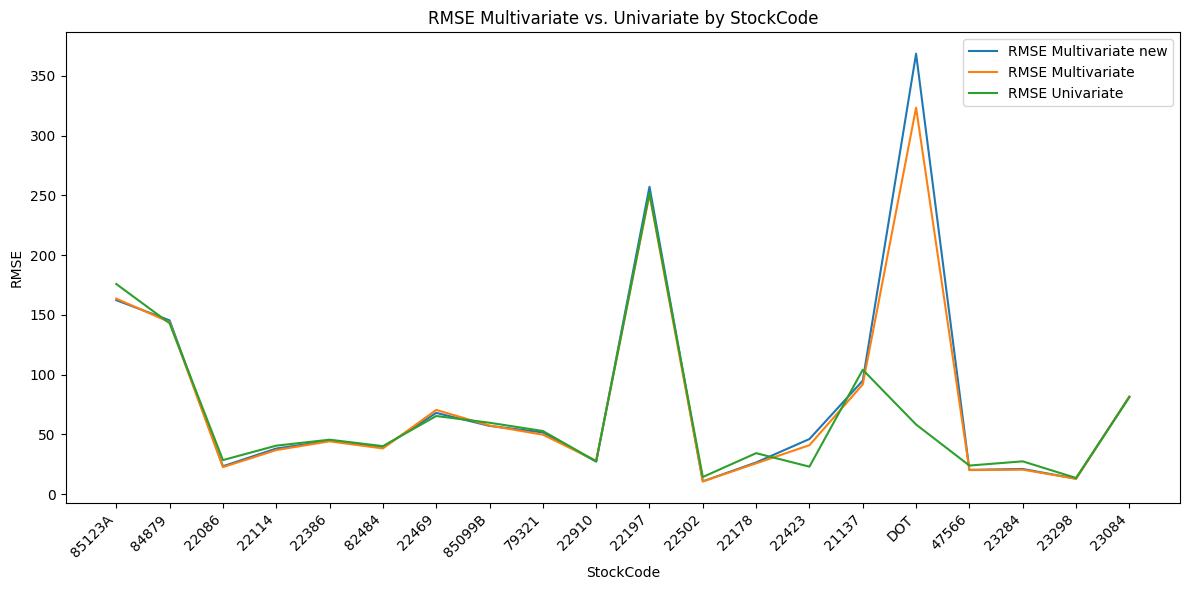

In [134]:
# prompt: plot RMSE and RMSE_univariate vs StockCode from df_combined1

import matplotlib.pyplot as plt

# Assuming df_combined1 is your DataFrame with 'StockCode', 'RMSE_multivariate', and 'RMSE_univariate' columns
# Replace 'df_combined1' with the actual name of your DataFrame if it's different.

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df_combined1['StockCode'], df_combined1['RMSE'], label='RMSE Multivariate new')
plt.plot(df_combined1['StockCode'], df_combined1['RMSE_multivariate'], label='RMSE Multivariate')
plt.plot(df_combined1['StockCode'], df_combined1['RMSE_univariate'], label='RMSE Univariate')

plt.xlabel('StockCode')
plt.ylabel('RMSE')
plt.title('RMSE Multivariate vs. Univariate by StockCode')
plt.legend()
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
